# BaseBall Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV


In [2]:
bb = pd.read_csv("C:/Users/vaddi/Downloads/baseball.csv")
bb

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [3]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Let's find if dataset contains any null values.

In [4]:
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values present in the data set. Now, let's visualize the same using heatmap

<AxesSubplot:>

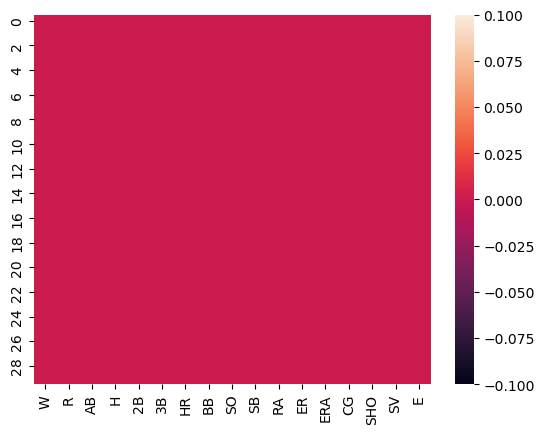

In [5]:
sns.heatmap(bb.isnull())

Let's check the data types of the columns present in the dataset

In [6]:
bb.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here, it is observed that the data types of all the columns in the dataset are numerical. 

Let's get the statistical information for the same

In [7]:
bb.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

# Data visualization

689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


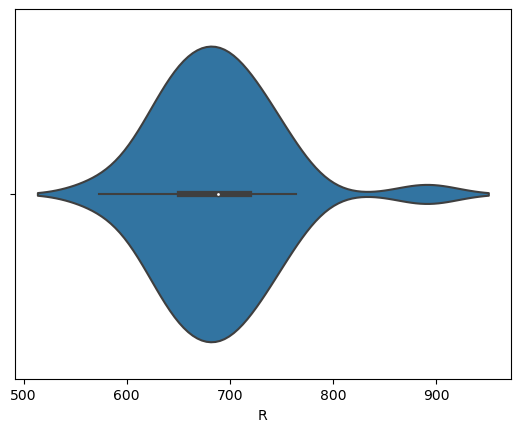

In [8]:
#Visualization of R data
ax = sns.violinplot(x="R", data=bb)
print(bb['R'].value_counts())

It is observed that the max data lies between 600 to 800

5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


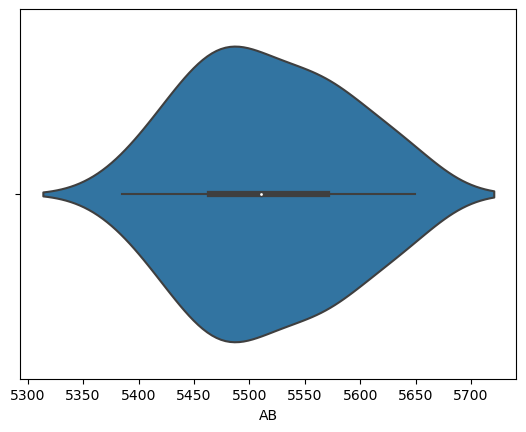

In [9]:
#Visualization of 'AB' data
ax = sns.violinplot(x="AB", data=bb)
print(bb['AB'].value_counts())

IT is observed that the max data lies between 5400 to 5650

1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1
1379    1
1331    1
1419    1
1495    1
1383    1
1370    1
1397    1
1480    1
1515    1
1381    1
1395    1
1479    1
Name: H, dtype: int64


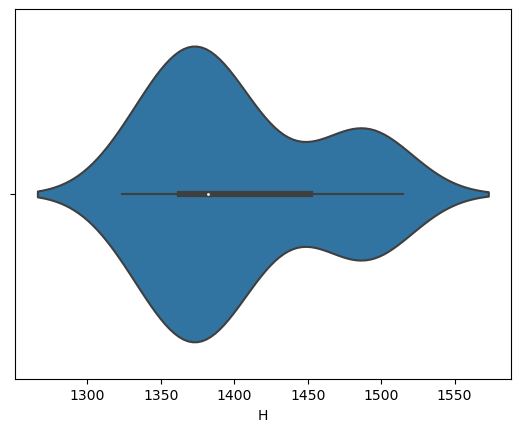

In [10]:
#Visualization of H data
ax = sns.violinplot(x="H", data=bb)
print(bb['H'].value_counts())

IT is observed that the max datalies between 1350 to 1450

272    3
260    2
289    2
278    2
277    2
274    2
288    2
300    1
292    1
251    1
236    1
265    1
295    1
257    1
243    1
262    1
279    1
294    1
246    1
308    1
303    1
263    1
Name: 2B, dtype: int64


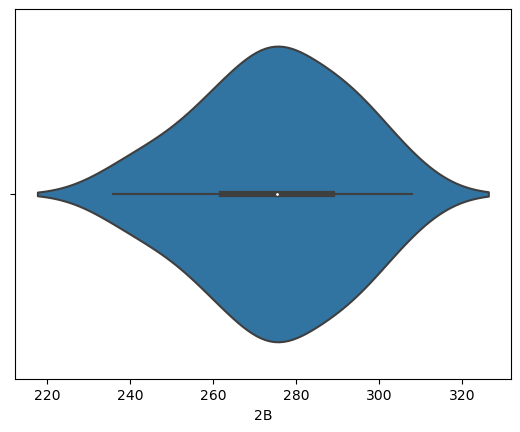

In [11]:
#Visualization of '2B' data
ax = sns.violinplot(x="2B", data=bb)
print(bb['2B'].value_counts())

It is observed that the max data lies between 260 to 280

27    3
39    2
49    2
17    2
32    2
26    2
42    1
48    1
37    1
18    1
40    1
13    1
34    1
30    1
21    1
46    1
22    1
44    1
33    1
20    1
19    1
29    1
36    1
Name: 3B, dtype: int64


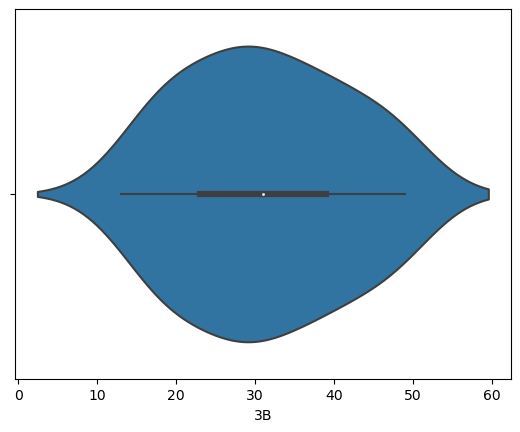

In [12]:
#ax = sns.violinplot(x="3B", data=bb, hue='W', color=greens)
ax = sns.violinplot(x="3B", data=bb)
print(bb['3B'].value_counts())

It is observed that the max data lies between 20 to 40

136    2
167    2
177    2
139    1
137    1
148    1
154    1
187    1
130    1
100    1
120    1
145    1
171    1
140    1
198    1
146    1
156    1
176    1
230    1
172    1
161    1
217    1
212    1
232    1
151    1
141    1
186    1
Name: HR, dtype: int64


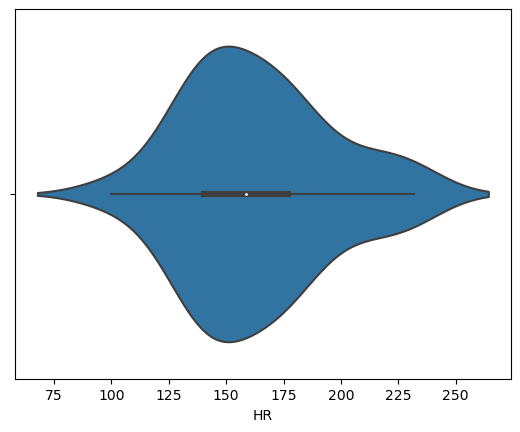

In [13]:
ax = sns.violinplot(x="HR", data=bb)
print(bb['HR'].value_counts())

It is observed that the max data lies between 150 to 175

478    2
383    1
461    1
426    1
490    1
457    1
563    1
387    1
471    1
375    1
539    1
488    1
496    1
412    1
567    1
506    1
439    1
475    1
435    1
486    1
503    1
436    1
418    1
554    1
570    1
455    1
404    1
533    1
388    1
Name: BB, dtype: int64


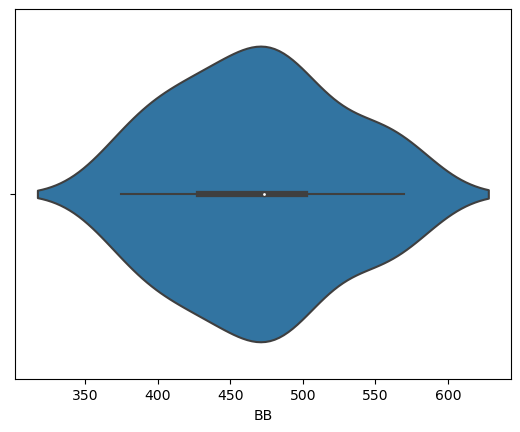

In [14]:
ax = sns.violinplot(x="BB", data=bb)
print(bb['BB'].value_counts())

It is observed that the max data lies between 450 to 500

1150    2
973     1
1267    1
1327    1
1312    1
1159    1
1258    1
1274    1
1107    1
1344    1
1290    1
1255    1
1299    1
1518    1
1322    1
1119    1
1264    1
1336    1
1392    1
1233    1
1148    1
1310    1
1331    1
1227    1
1151    1
1259    1
1231    1
1157    1
1283    1
Name: SO, dtype: int64


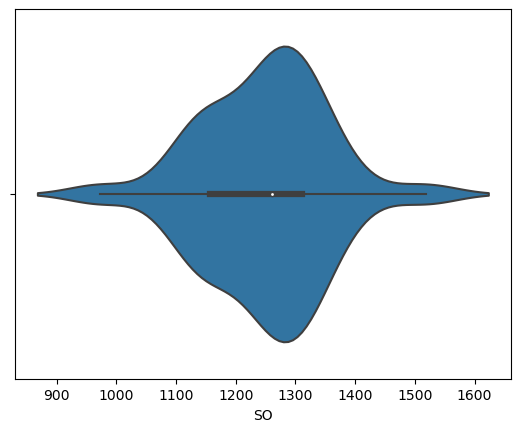

In [15]:
ax = sns.violinplot(x="SO", data=bb)
print(bb['SO'].value_counts())

It is observed that the max data lies between 1200 to 1300

69     3
88     2
78     1
82     1
132    1
93     1
59     1
112    1
57     1
51     1
134    1
84     1
95     1
98     1
104    1
70     1
52     1
121    1
101    1
71     1
87     1
44     1
63     1
83     1
68     1
86     1
97     1
Name: SB, dtype: int64


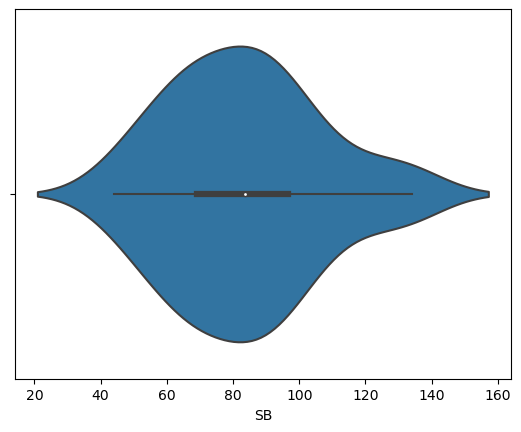

In [16]:
ax = sns.violinplot(x="SB", data=bb)
print(bb['SB'].value_counts())

It is observed that the max data lies between 70 to 90

641    1
700    1
731    1
713    1
627    1
595    1
809    1
760    1
678    1
635    1
613    1
754    1
737    1
608    1
596    1
525    1
729    1
726    1
675    1
618    1
733    1
753    1
642    1
693    1
698    1
670    1
803    1
701    1
640    1
844    1
Name: RA, dtype: int64


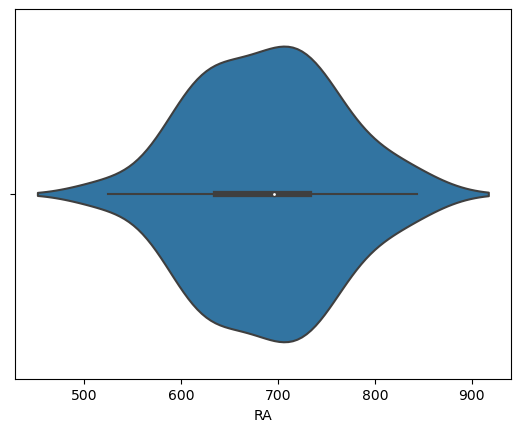

In [17]:
ax = sns.violinplot(x="RA", data=bb)
print(bb['RA'].value_counts())

It is observed that the max data lies between 600 to 700

601    1
653    1
655    1
659    1
597    1
553    1
749    1
698    1
638    1
577    1
557    1
700    1
682    1
546    1
532    1
478    1
664    1
677    1
630    1
572    1
680    1
694    1
604    1
646    1
652    1
609    1
746    1
643    1
584    1
799    1
Name: ER, dtype: int64


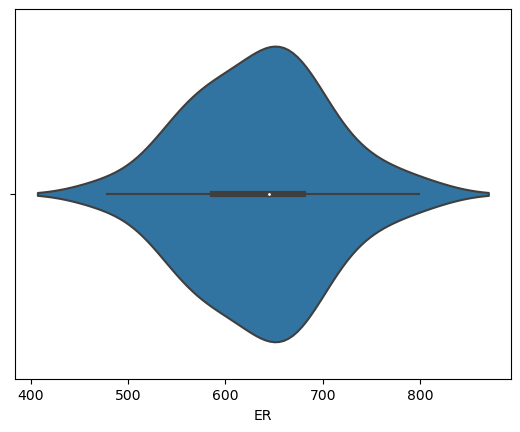

In [18]:
ax = sns.violinplot(x="ER", data=bb)
print(bb['ER'].value_counts())

It is observed that the max data lies between 600 to 700

3.73    1
4.07    1
4.09    1
4.04    1
3.72    1
3.44    1
4.69    1
4.41    1
4.02    1
3.62    1
3.43    1
4.33    1
4.28    1
3.36    1
3.21    1
2.94    1
4.14    1
4.16    1
3.94    1
3.57    1
4.24    1
4.31    1
3.74    1
4.05    1
4.03    1
3.80    1
4.64    1
3.98    1
3.67    1
5.04    1
Name: ERA, dtype: int64


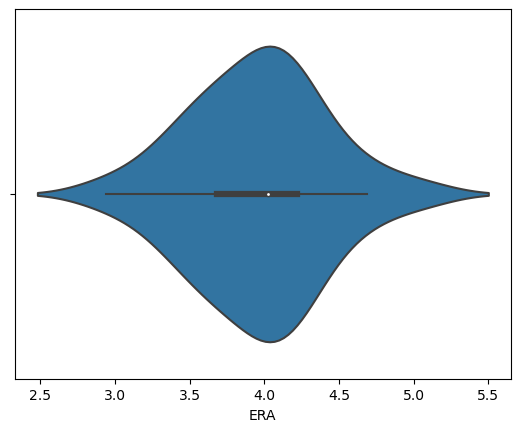

In [19]:
ax = sns.violinplot(x="ERA", data=bb)
print(bb['ERA'].value_counts())

It is observed that the max data lies between 4.0 to 4.5

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


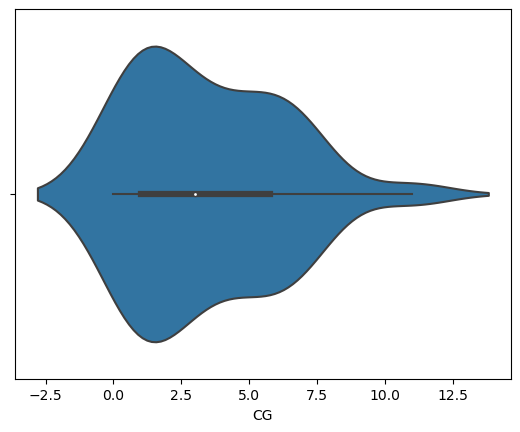

In [20]:
ax = sns.violinplot(x="CG", data=bb)
print(bb['CG'].value_counts())

It is observed that the max data lies between 1.5 to 2.5

12    7
10    5
13    3
8     2
9     2
4     2
15    2
21    2
7     2
14    1
18    1
6     1
Name: SHO, dtype: int64


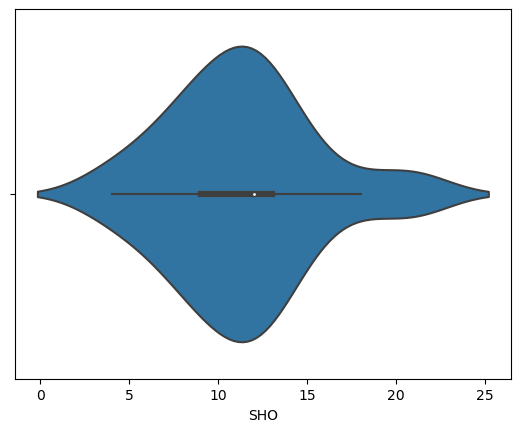

In [21]:
ax = sns.violinplot(x="SHO", data=bb)
print(bb['SHO'].value_counts())

It is observed that the max data lies between 10 to 15

35    4
41    3
45    3
44    2
48    2
40    2
56    1
28    1
47    1
50    1
54    1
62    1
39    1
46    1
60    1
43    1
34    1
37    1
38    1
36    1
Name: SV, dtype: int64


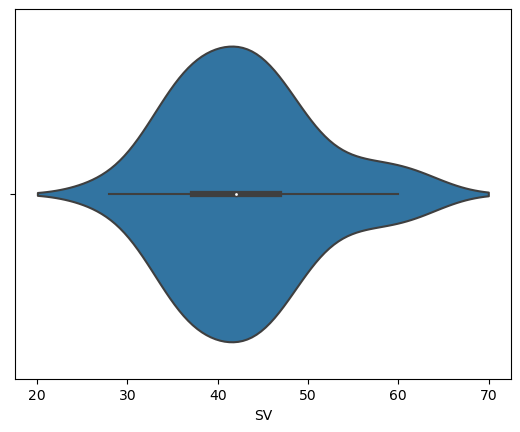

In [22]:
ax = sns.violinplot(x="SV", data=bb)
print(bb['SV'].value_counts())

It is observed that the max data lies around 40

88     3
90     3
86     3
93     2
77     2
95     2
122    1
78     1
75     1
117    1
116    1
111    1
94     1
96     1
126    1
85     1
119    1
97     1
101    1
79     1
92     1
Name: E, dtype: int64


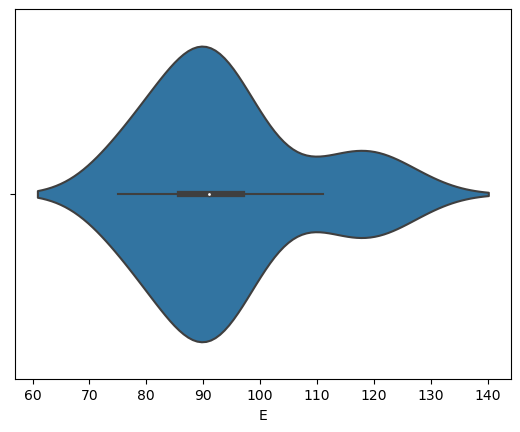

In [23]:
ax = sns.violinplot(x="E", data=bb)
print(bb['E'].value_counts())

It is observed that the max data lies between 80 to 100

Bivariant Analysis

Let's check the effect of the independent variable with 'W'

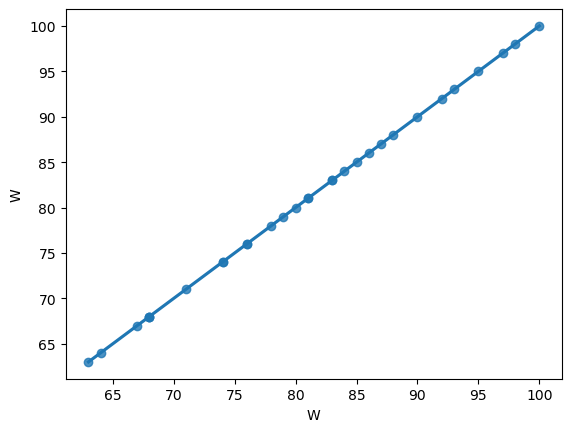

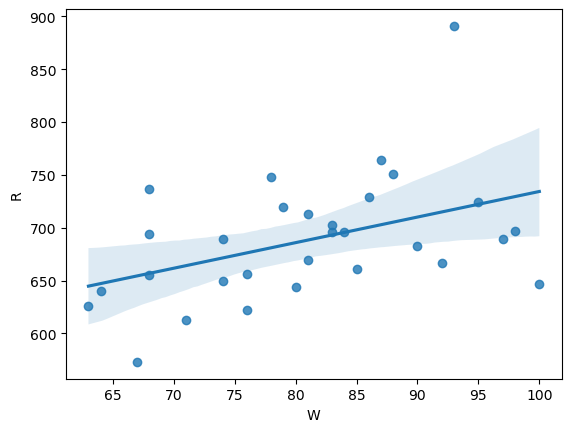

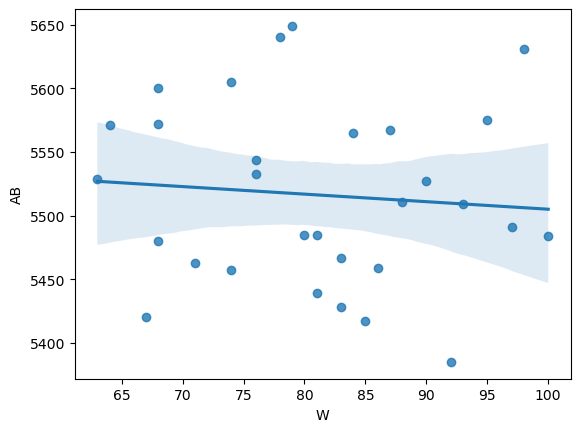

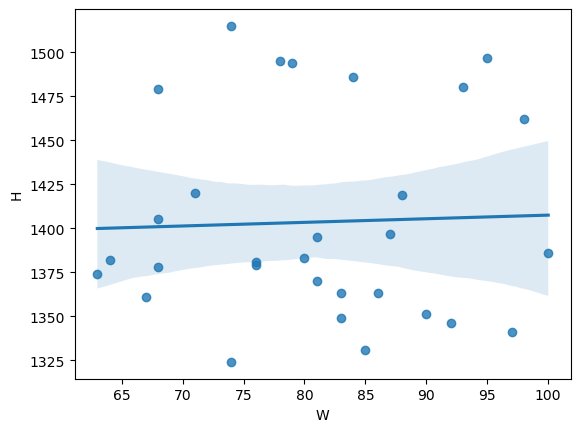

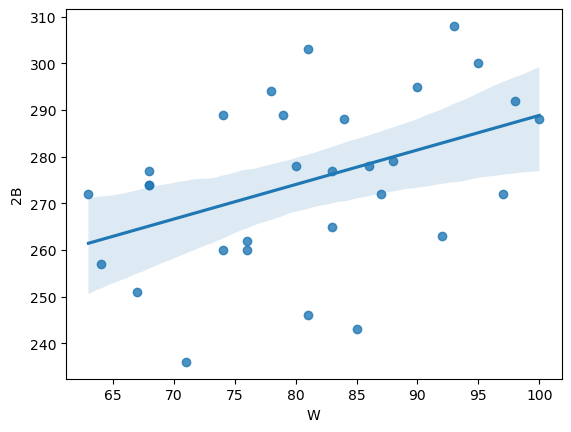

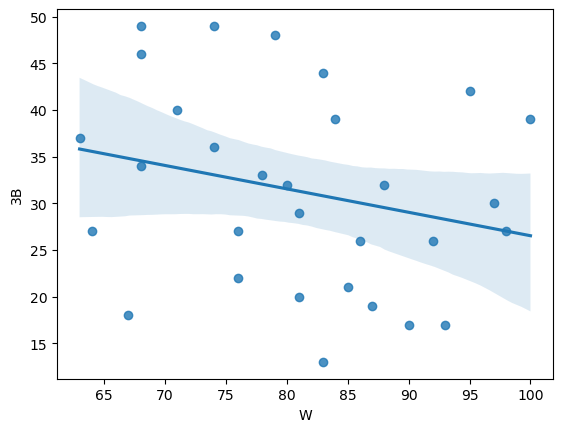

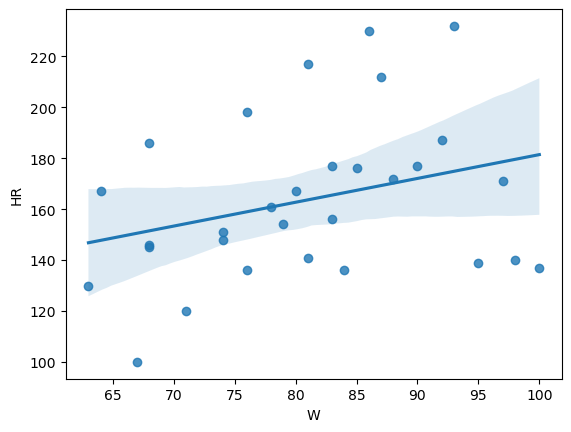

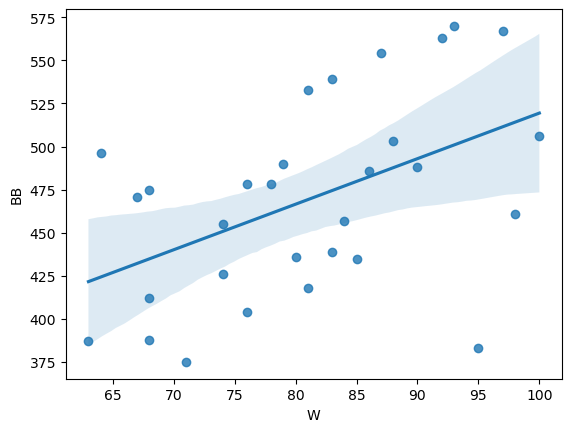

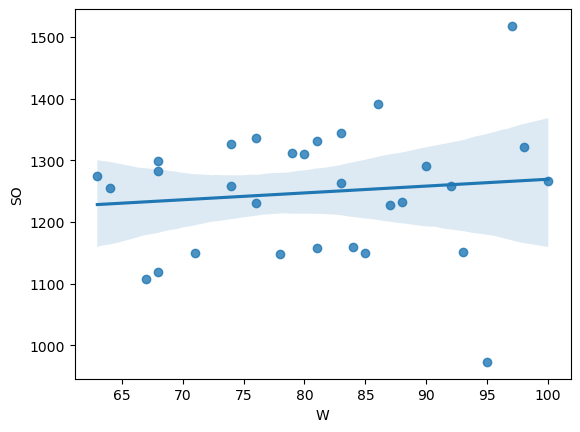

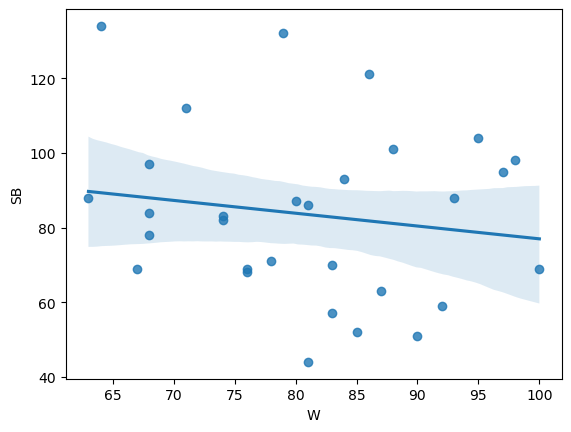

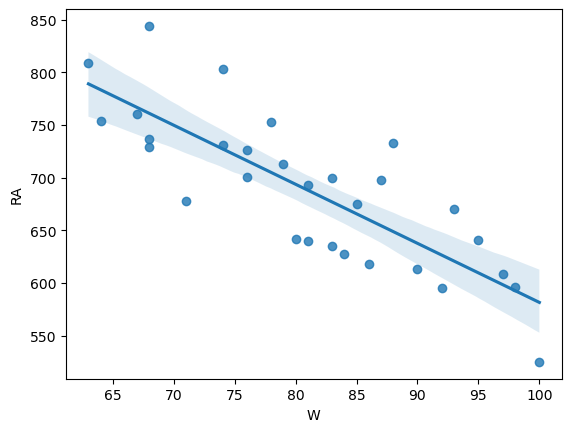

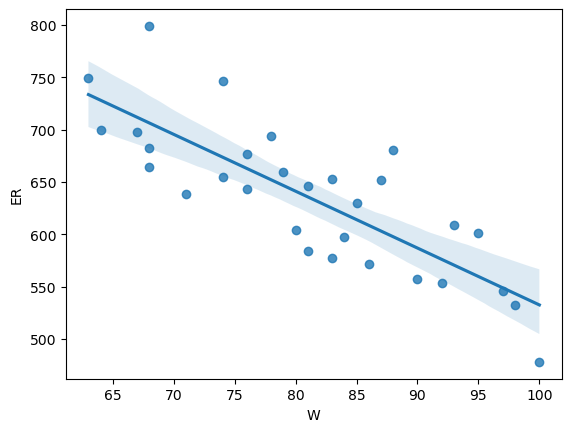

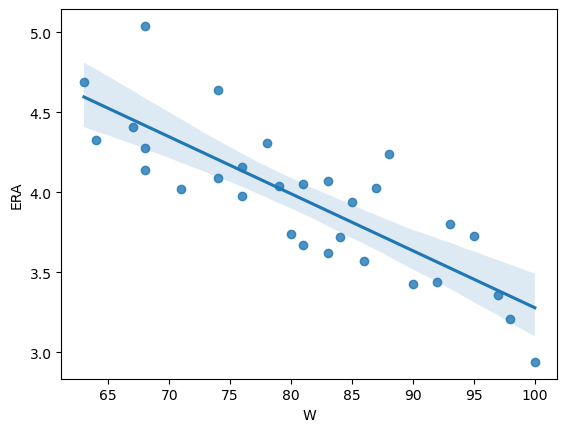

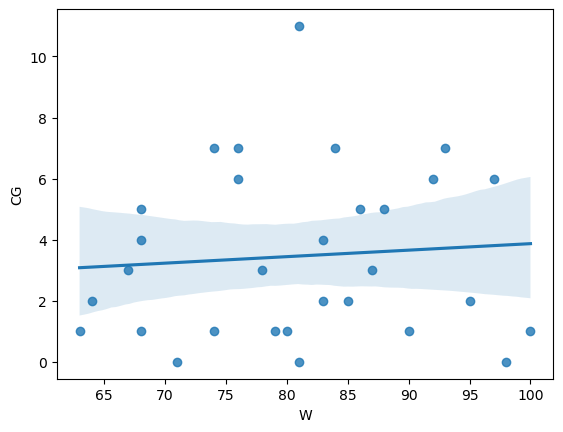

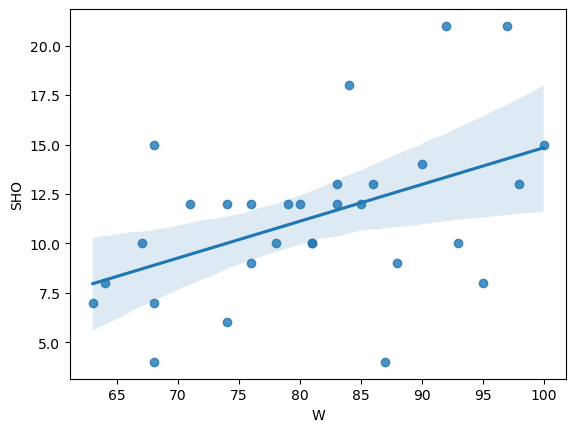

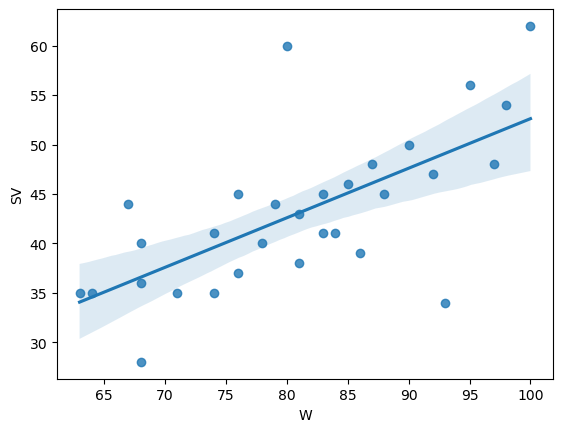

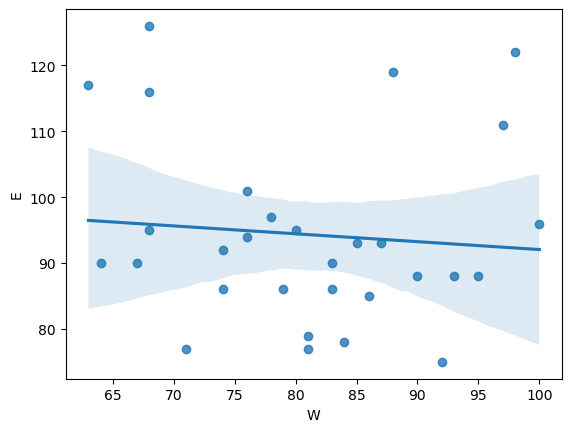

In [24]:
for i in bb.columns:
    sns.regplot(x='W', y=i, data=bb)
    plt.show()

Multivariant Analysis

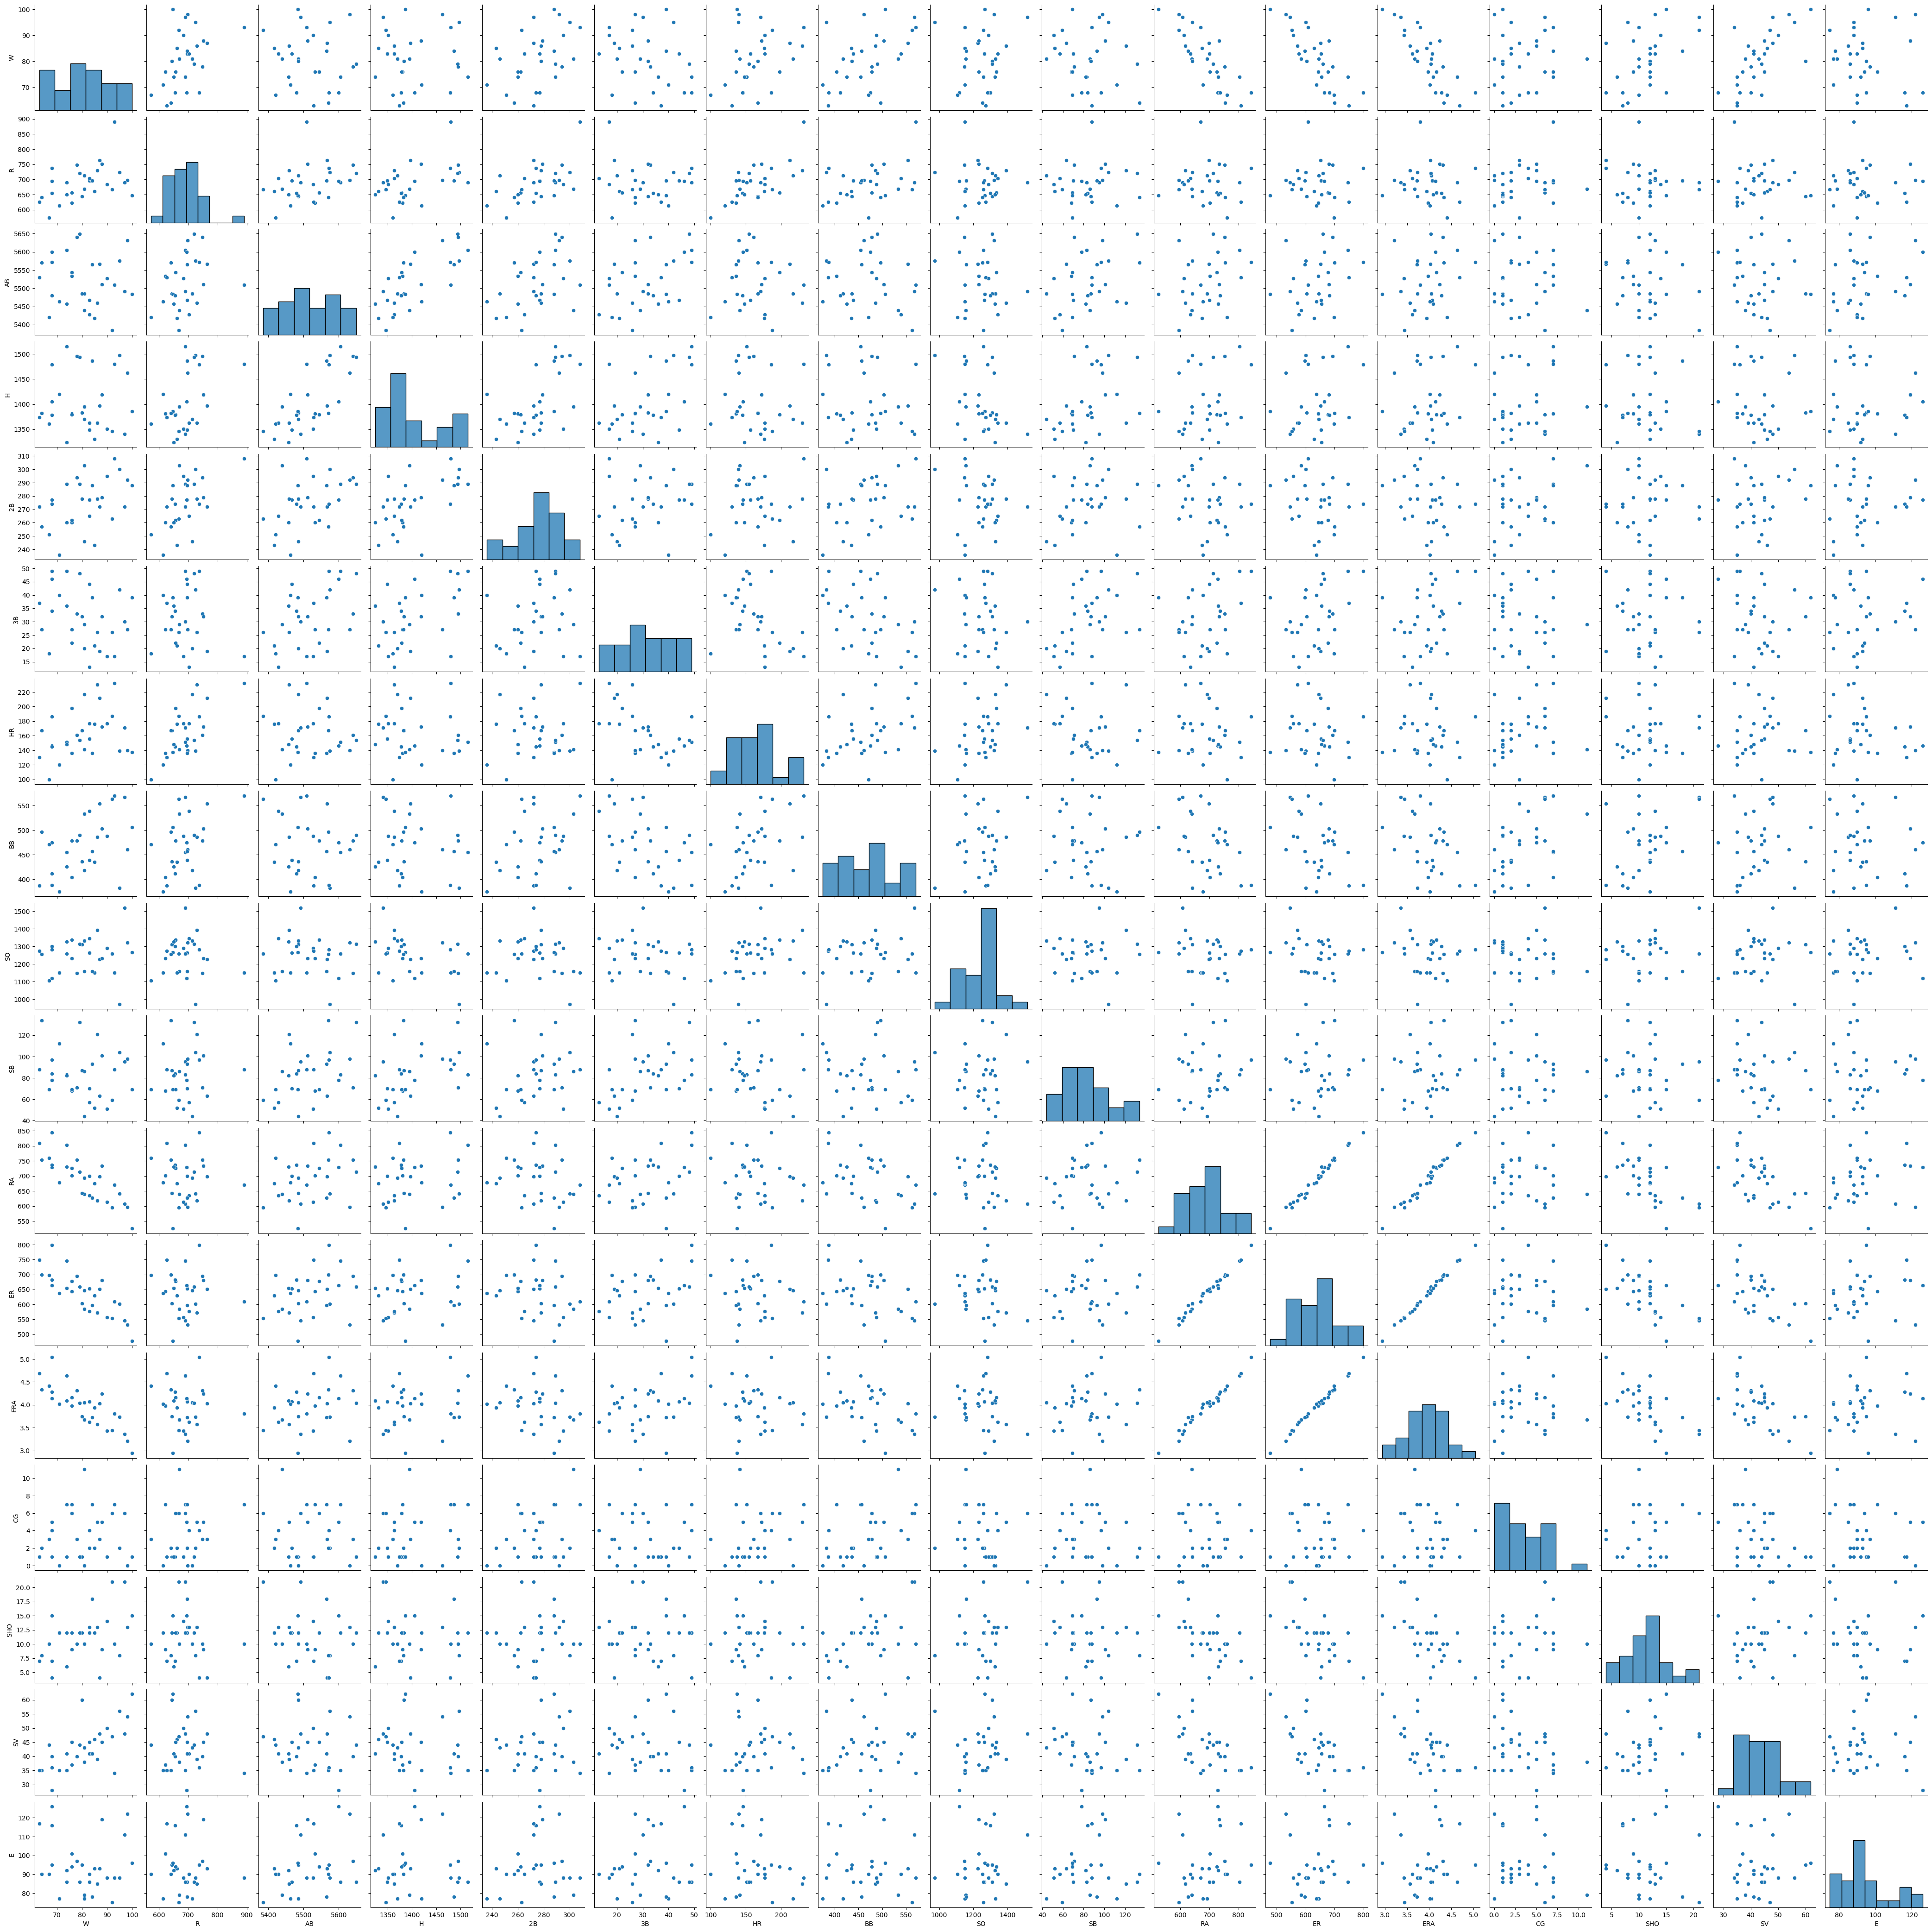

In [25]:
sns.pairplot(bb)
plt.show()

Let's check for the Outliers

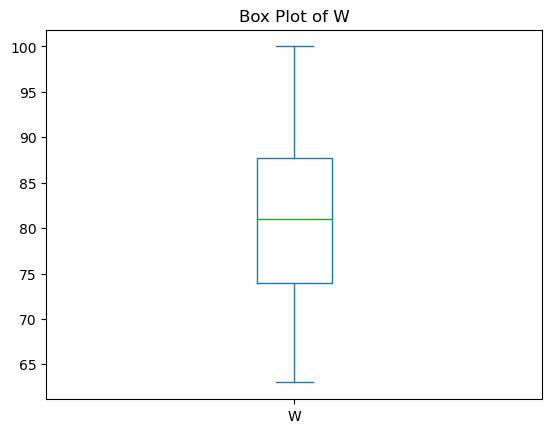

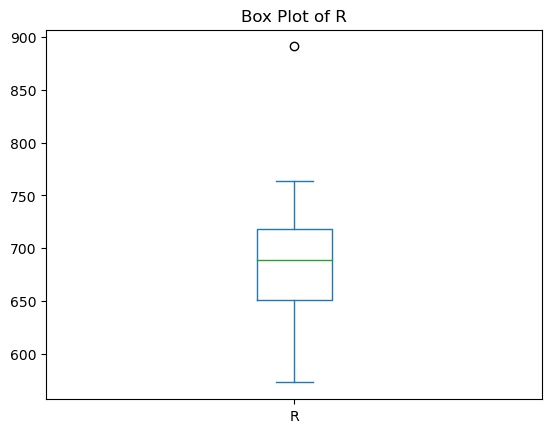

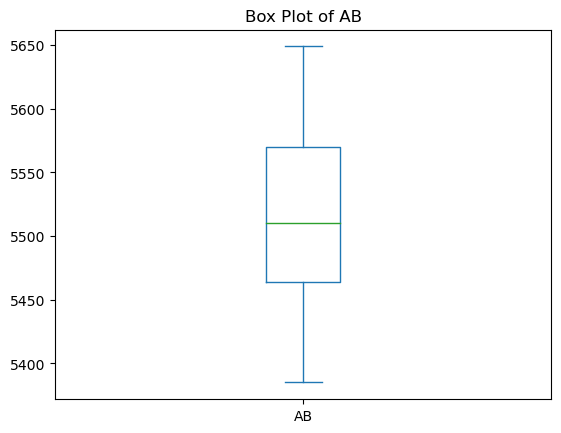

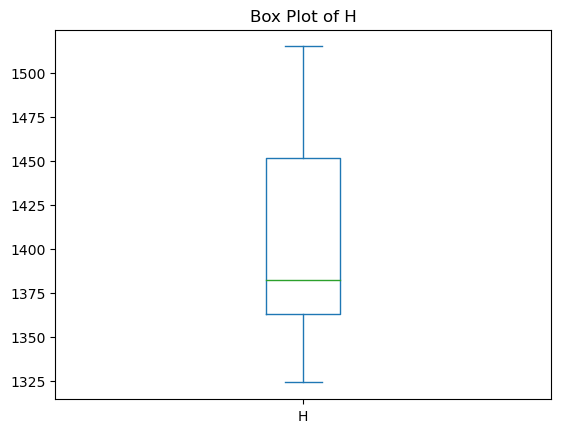

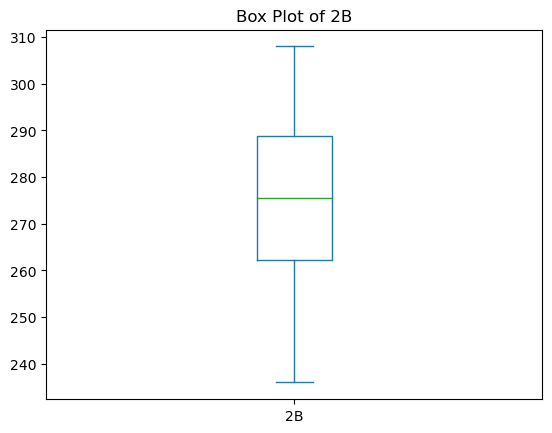

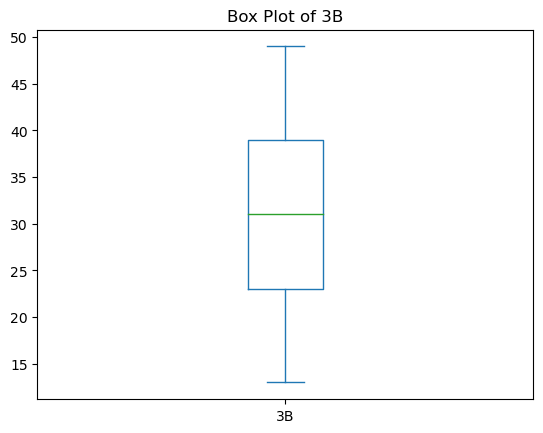

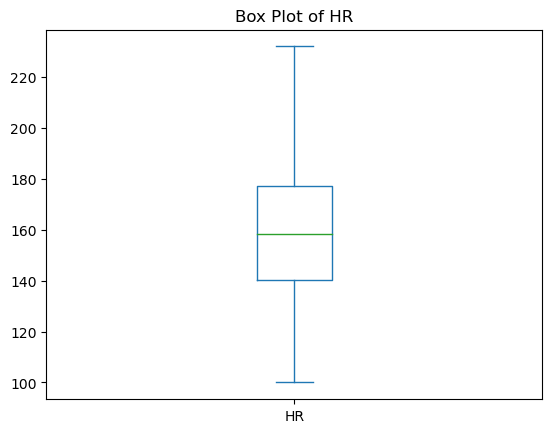

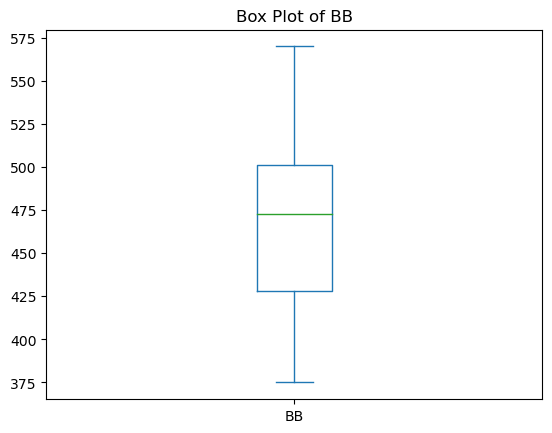

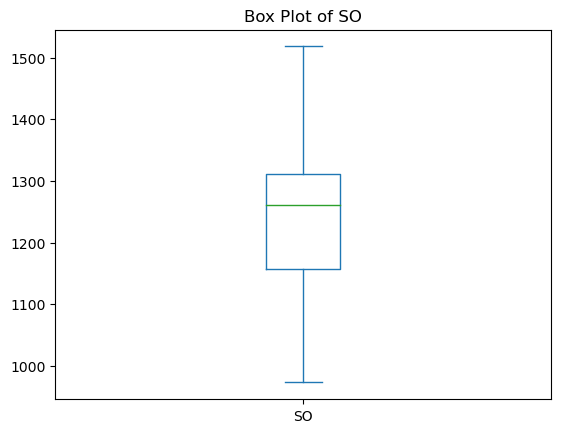

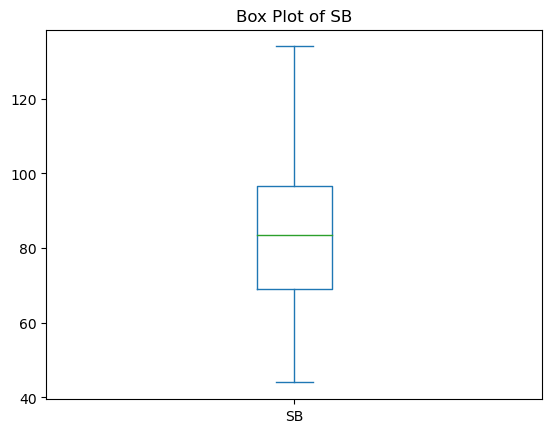

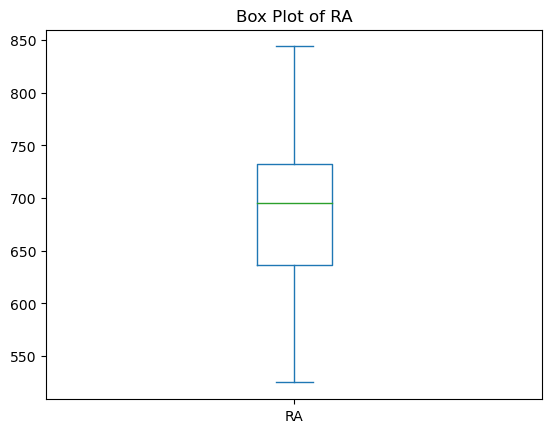

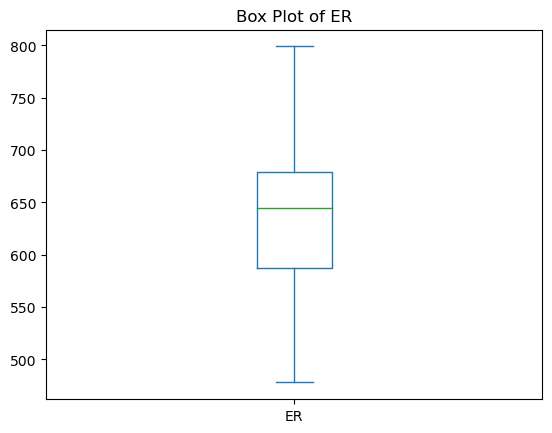

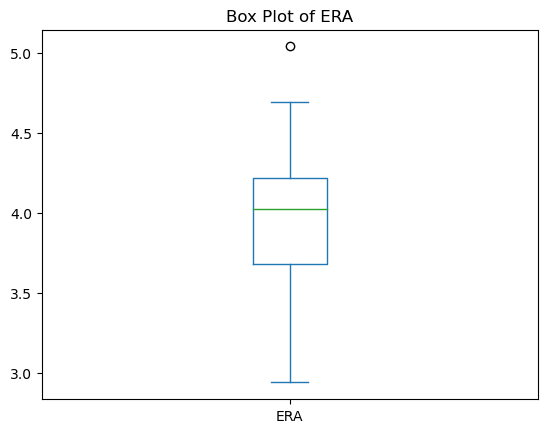

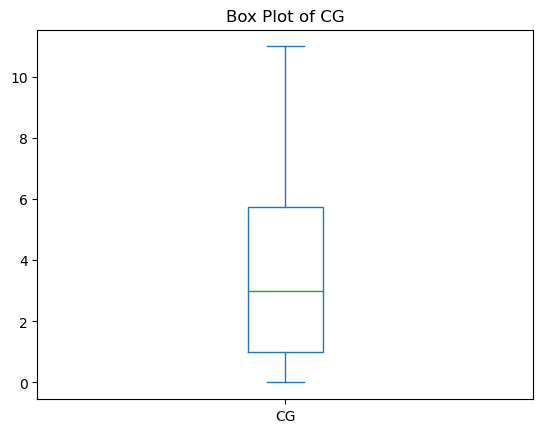

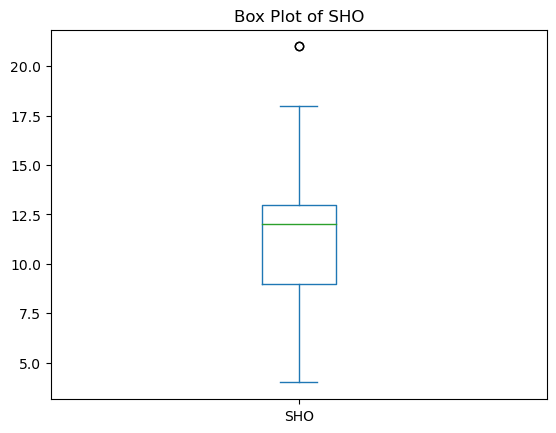

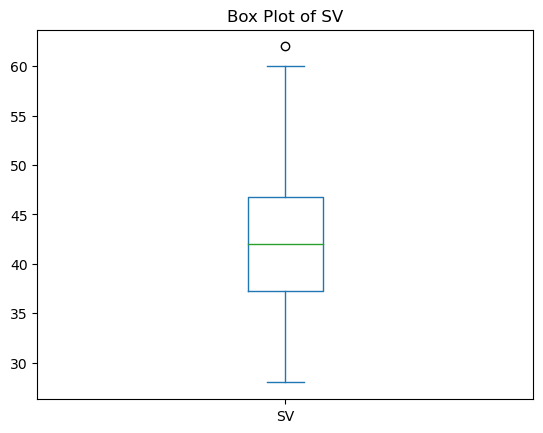

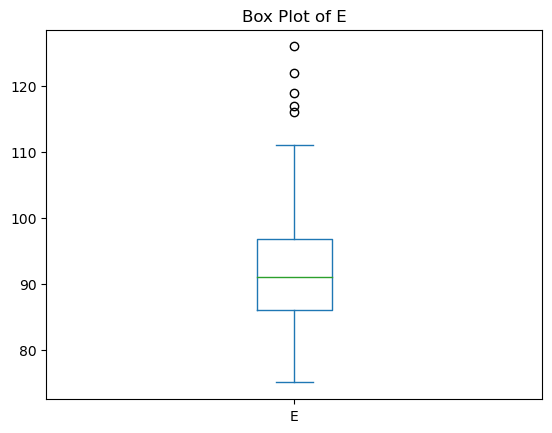

In [26]:
for i in bb.columns:
    bb[i].plot.box()
    plt.title(f'Box Plot of {i}')
    plt.show()

Outliers are observed for few attributes like ERA and E

In [27]:
z=np.abs(zscore(bb))

In [28]:
Threshold= 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [29]:
z.iloc[5][1]

3.5096470447193067

Let's create new dataset by removing the outliers

In [30]:
bb_df= bb[(z<3).all(axis=1)]

In [31]:
x= bb_df.iloc[:,1:]
x

R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0   724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1   696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2   669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3   622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4   689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
6   764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3    4   
7   713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   10   
8   644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   12   
9   748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   10   
10  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5    9   
11  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   13   
12  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   12   
13  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   12   
14  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   15   
15  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   15   
16  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   13   
17  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   21   
18  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1    7   
19  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2    8   
20  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   14   
21  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   13   
22  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   12   
23  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   10   
24  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1    7   
25  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   21   
26  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   18   
27  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   12   
28  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1    6   
29  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4    4   

    SV    E  
0   56   88  
1   45   86  
2   38   79  
3   37  101  
4   35   86  
6   48   93  
7   43   77  
8   60   95  
9   40   97  
10  45  119  
11  39   85  
12  46   93  
13  45   94  
14  28  126  
15  62   96  
16  54  122  
17  48  111  
18  40  116  
19  35   90  
20  50   88  
21  41   90  
22  35   77  
23  44   90  
24  35  117  
25  47   75  
26  41   78  
27  44   86  
28  41   92  
29  36   95

In [32]:
y=bb_df.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

Let's find the skewness

In [33]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [34]:
#Let's reduce the Skewness 
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [35]:
print(x.skew())

R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.116970
SV     0.109983
E      0.586101
dtype: float64


C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


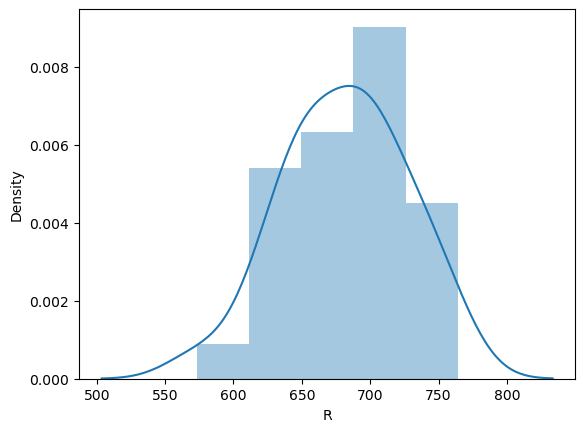

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


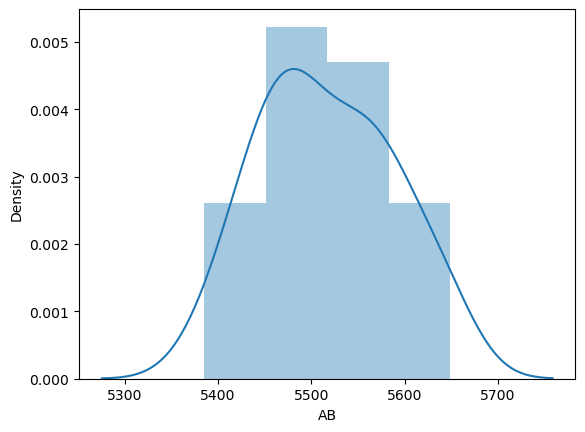

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


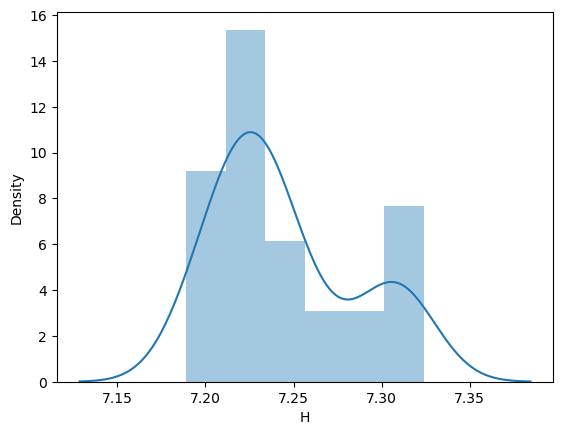

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


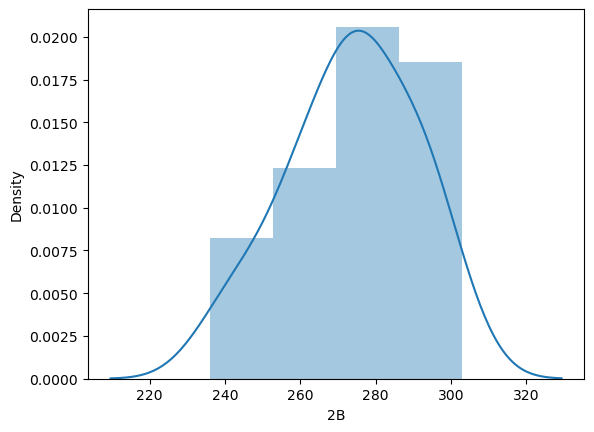

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


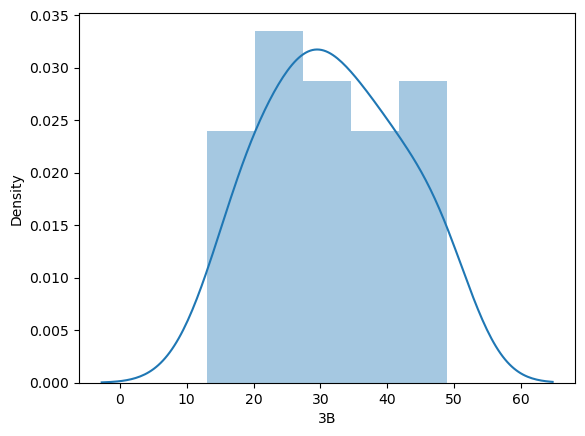

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


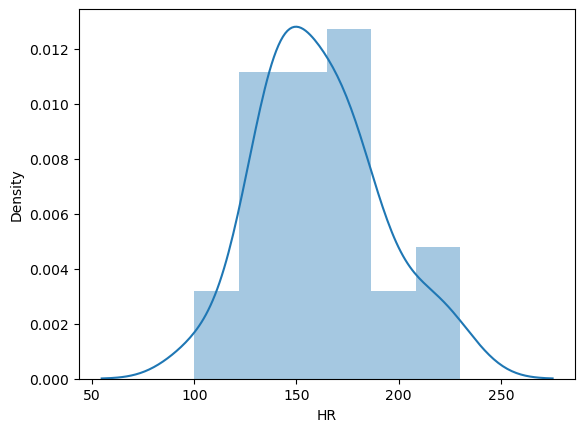

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


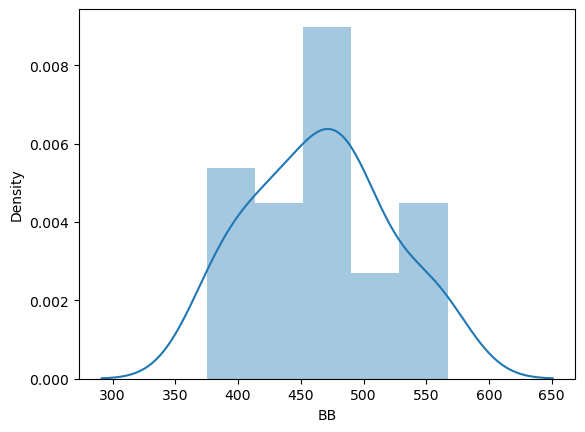

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


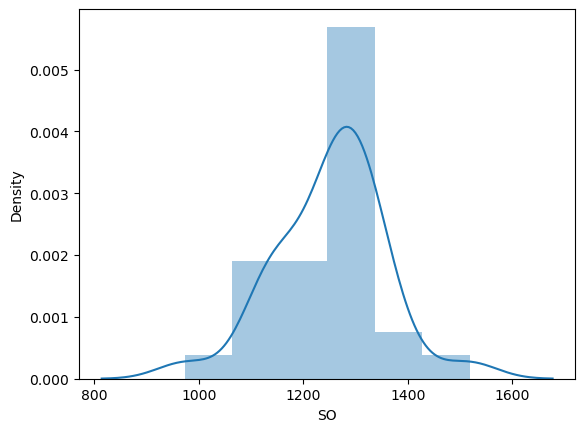

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


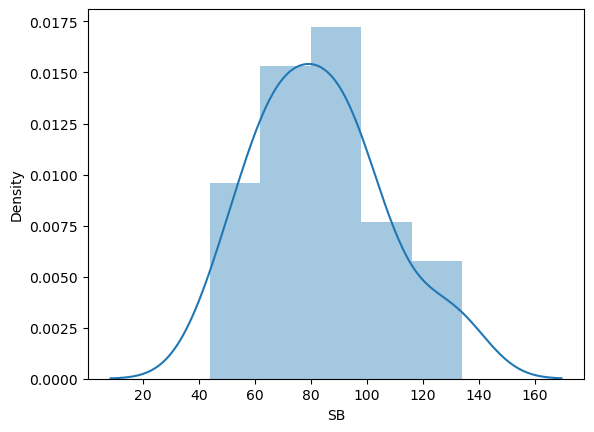

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


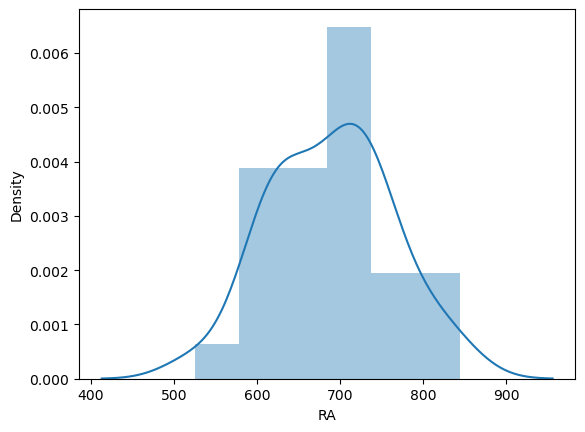

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


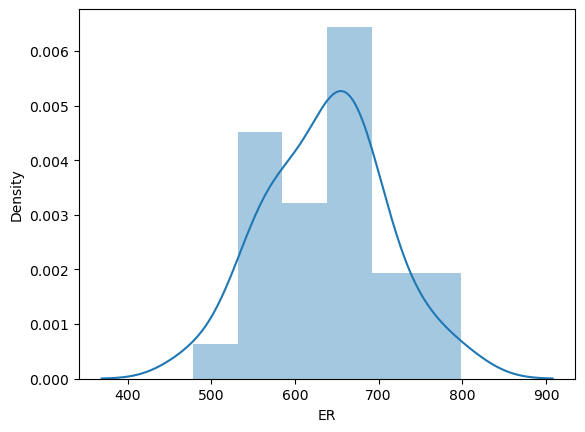

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


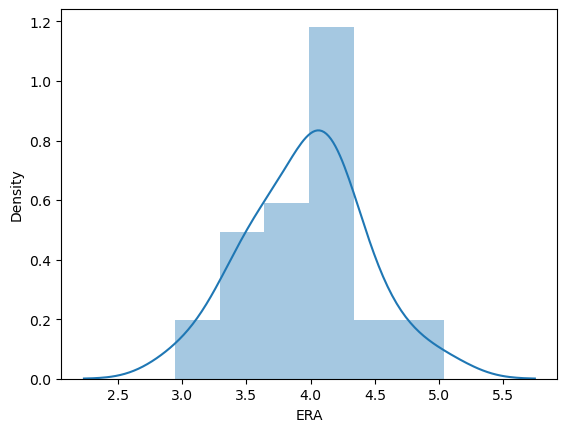

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


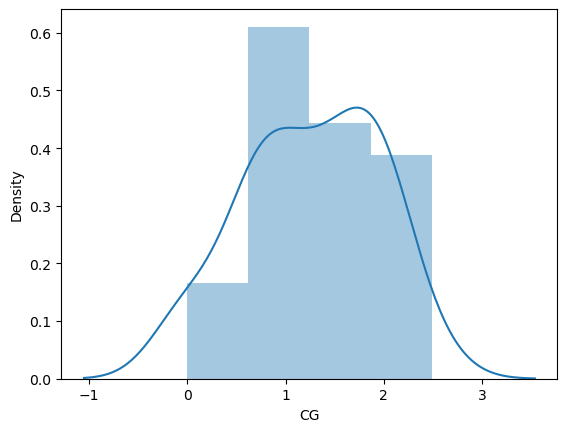

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


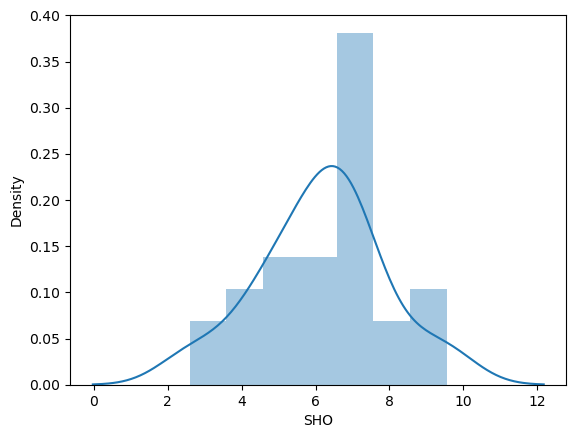

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


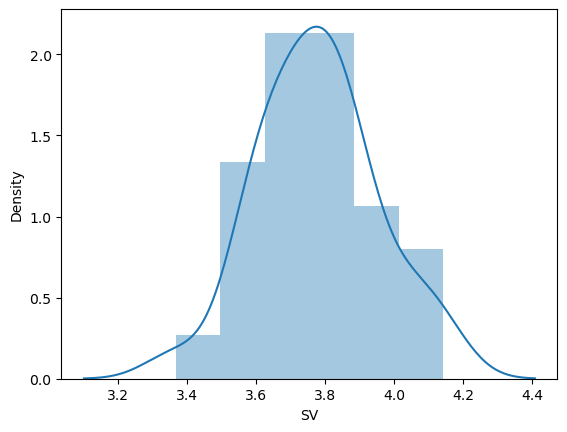

C:\Users\vaddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


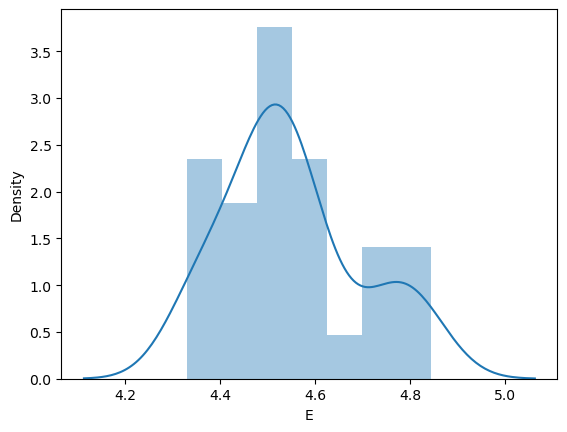

In [36]:
for i in x.columns:
    sns.distplot(x[i])
    plt.show()

In [37]:
corr=x.corr()
corr

R        AB         H        2B        3B        HR        BB  \
R    1.000000  0.438022  0.432236  0.469293  0.134204  0.586894  0.258450   
AB   0.438022  1.000000  0.770154  0.490752  0.445604 -0.064653 -0.137850   
H    0.432236  0.770154  1.000000  0.527354  0.579735 -0.219201 -0.221773   
2B   0.469293  0.490752  0.527354  1.000000  0.342419 -0.098695  0.211243   
3B   0.134204  0.445604  0.579735  0.342419  1.000000 -0.369299 -0.404852   
HR   0.586894 -0.064653 -0.219201 -0.098695 -0.369299  1.000000  0.336814   
BB   0.258450 -0.137850 -0.221773  0.211243 -0.404852  0.336814  1.000000   
SO   0.081158 -0.111243 -0.373301 -0.096772 -0.196586  0.479914  0.315566   
SB   0.075323  0.373674  0.420199  0.194308  0.483818 -0.166072 -0.117622   
RA  -0.013858  0.315499  0.243639 -0.215196  0.312750 -0.092586 -0.425381   
ER   0.007727  0.309146  0.279956 -0.224993  0.333731 -0.062094 -0.455832   
ERA -0.009122  0.254872  0.255886 -0.248212  0.325883 -0.070756 -0.465794   
CG   0.164021 -0.056349  0.062589  0.226900 -0.002910  0.126024  0.448140   
SHO -0.118371 -0.191897 -0.126919  0.089480 -0.067850 -0.029878  0.433304   
SV   0.080162 -0.142034 -0.099684  0.246600 -0.259901  0.100228  0.205211   
E    0.041193  0.321833 -0.012775  0.146978  0.098532 -0.182374 -0.052376   

           SO        SB        RA        ER       ERA        CG       SHO  \
R    0.081158  0.075323 -0.013858  0.007727 -0.009122  0.164021 -0.118371   
AB  -0.111243  0.373674  0.315499  0.309146  0.254872 -0.056349 -0.191897   
H   -0.373301  0.420199  0.243639  0.279956  0.255886  0.062589 -0.126919   
2B  -0.096772  0.194308 -0.215196 -0.224993 -0.248212  0.226900  0.089480   
3B  -0.196586  0.483818  0.312750  0.333731  0.325883 -0.002910 -0.067850   
HR   0.479914 -0.166072 -0.092586 -0.062094 -0.070756  0.126024 -0.029878   
BB   0.315566 -0.117622 -0.425381 -0.455832 -0.465794  0.448140  0.433304   
SO   1.000000  0.038188 -0.140570 -0.177655 -0.195362 -0.068395  0.198432   
SB   0.038188  1.000000  0.134315  0.146243  0.128848 -0.042099 -0.099416   
RA  -0.140570  0.134315  1.000000  0.991286  0.986781  0.079492 -0.642189   
ER  -0.177655  0.146243  0.991286  1.000000  0.997261  0.084401 -0.639834   
ERA -0.195362  0.128848  0.986781  0.997261  1.000000  0.090781 -0.640301   
CG  -0.068395 -0.042099  0.079492  0.084401  0.090781  1.000000  0.185177   
SHO  0.198432 -0.099416 -0.642189 -0.639834 -0.640301  0.185177  1.000000   
SV   0.119732 -0.193739 -0.629913 -0.608583 -0.623989 -0.295654  0.199364   
E    0.152594  0.078008  0.208579  0.143630  0.118979 -0.058128 -0.154455   

           SV         E  
R    0.080162  0.041193  
AB  -0.142034  0.321833  
H   -0.099684 -0.012775  
2B   0.246600  0.146978  
3B  -0.259901  0.098532  
HR   0.100228 -0.182374  
BB   0.205211 -0.052376  
SO   0.119732  0.152594  
SB  -0.193739  0.078008  
RA  -0.629913  0.208579  
ER  -0.608583  0.143630  
ERA -0.623989  0.118979  
CG  -0.295654 -0.058128  
SHO  0.199364 -0.154455  
SV   1.000000 -0.064737  
E   -0.064737  1.000000

<AxesSubplot:>

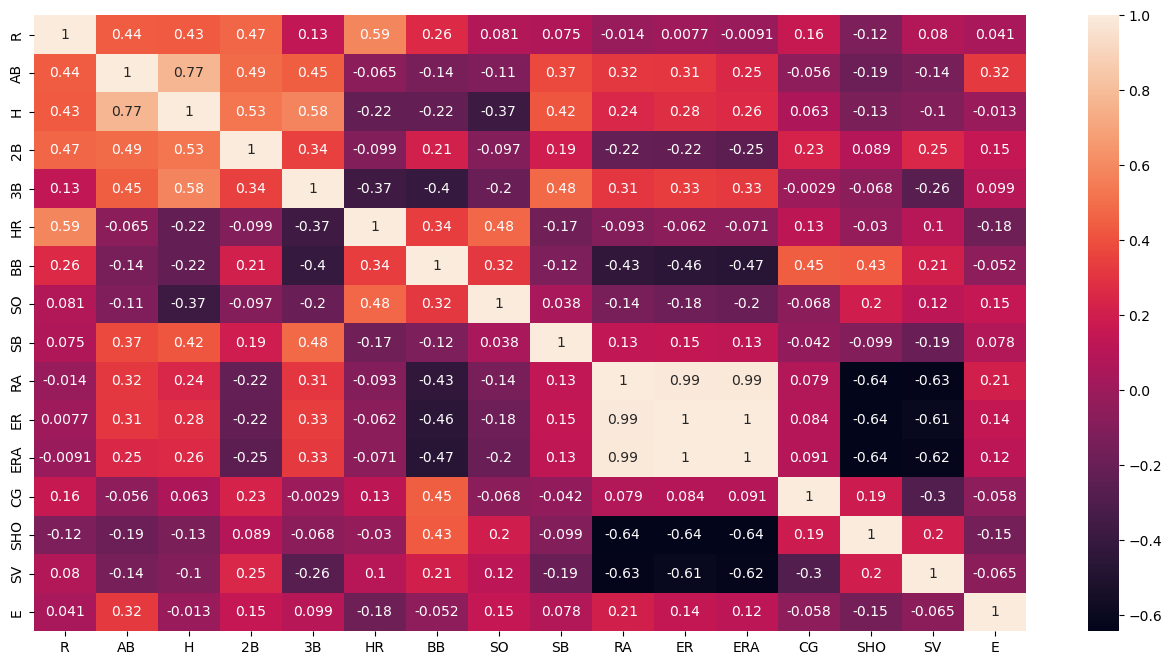

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

In [42]:
model.coef_

array([  3.27053819,  -6.03918878,   3.45550542,   0.09251363,
         1.36468806,   0.96453298,  -1.88965817,  -0.96060771,
        -2.36373514,   3.83747958,  62.74973405, -75.25425821,
         0.30504061,  -1.06298655,   0.9906519 ,  -0.52888228])

In [43]:
model.intercept_

80.69565217391298

In [44]:
model.score(x_train,y_train)

0.967976599219305

In [45]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 51.08
R-squared: 0.47


In [48]:
lasso = Lasso(alpha=0.1)

In [51]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
alpha_values = [0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_mse = float('inf')

In [53]:
for alpha in alpha_values:
    lasso.alpha = alpha
    mse_scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring=mse_scorer)
    average_mse = -np.mean(mse_scores)
    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha = alpha

C:\Users\vaddi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.656e+00, tolerance: 1.674e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaddi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.838e+01, tolerance: 2.167e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\vaddi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+01, toleranc

In [54]:
# Fit the model with the best alpha
lasso.alpha = best_alpha
lasso.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Optimal Lasso Alpha: {best_alpha}")
print(f"Test Mean Squared Error: {mse:.2f}")

Optimal Lasso Alpha: 1
Test Mean Squared Error: 19.68


# Saving Final model

In [51]:
import joblib
joblib.dump(lasso.fit, 'lasso.joblib')

['lasso.joblib']

# Avocado Project

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, make_scorer


import warnings
warnings.filterwarnings('ignore')


In [53]:
AV =  pd.read_csv("C:/Users/vaddi/Downloads/avocado.csv/avocado.csv")
AV

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [54]:
AV.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [55]:
AV.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

Let's check the Data types of the columns present in the dataset

In [56]:
AV.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Let's segregate the columns with the object data type and numerical data type in seperate lists

In [57]:
categorical_cols=[]
numerical_cols=[]
for i in AV.dtypes.index:
    if AV.dtypes[i] == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical Columns : ", categorical_cols)
print("Numerical_columns : ", numerical_cols)
        

Categorical Columns :  ['Date', 'type', 'region']
Numerical_columns :  ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


Let's check for the null values in the dataset

In [58]:
AV.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

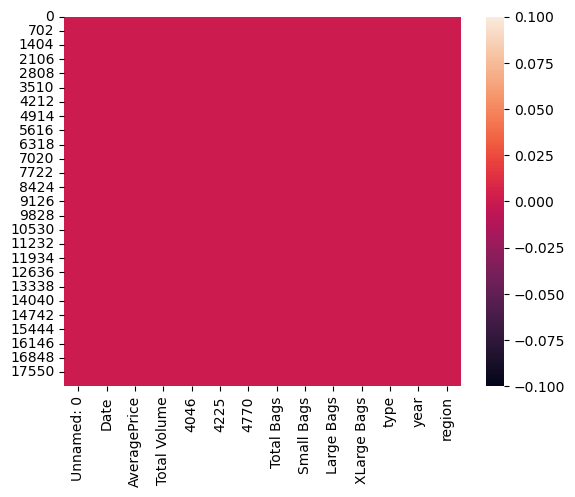

In [59]:
#data visuakization of the same
sns.heatmap(AV.isnull())

Let's check for the unique values in each column of the dataset

In [60]:
for i in AV.columns:
    print("Unique values in ", i, AV[i].unique())
    print("\n")

Unique values in  Unnamed: 0 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


Unique values in  Date ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '201

Here, we can see that the unnamed and date columns can be dropped from the dataset

In [61]:
list1 = ['Unnamed: 0','Date', 'Small Bags', 'Large Bags', 'XLarge Bags','Total Bags']
AV.drop(list1, axis=1, inplace=True)

Converting Categorical Columns to the numerical

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
AV['type'] = le.fit_transform(AV['type'])
AV['region'] = le.fit_transform(AV['region'])

In [63]:
AV.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

# Data Visualization

Univariate Analysis

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


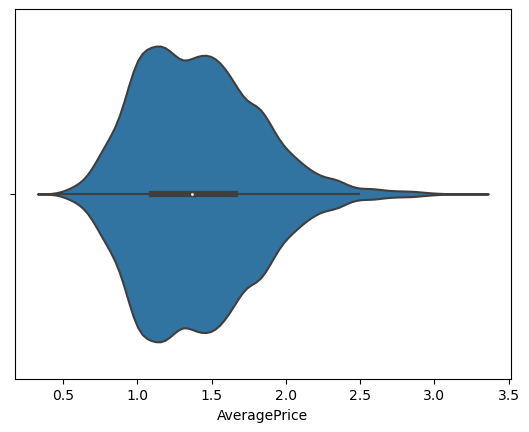

In [64]:
#Visualizing the Average Price
ax= sns.violinplot(x='AveragePrice', data=AV)
print(AV['AveragePrice'].value_counts())

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


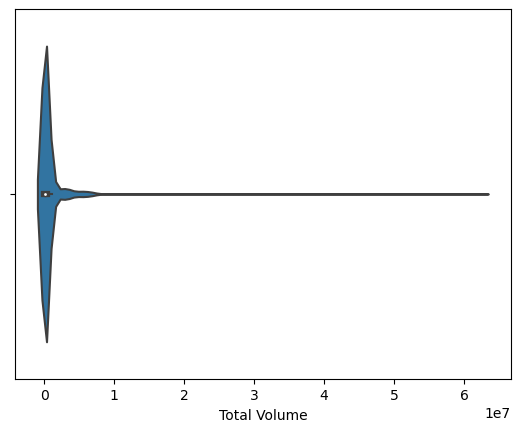

In [65]:
#visualizing the Total Volume
ax = sns.violinplot(x='Total Volume', data=AV)
print(AV['Total Volume'].value_counts())

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


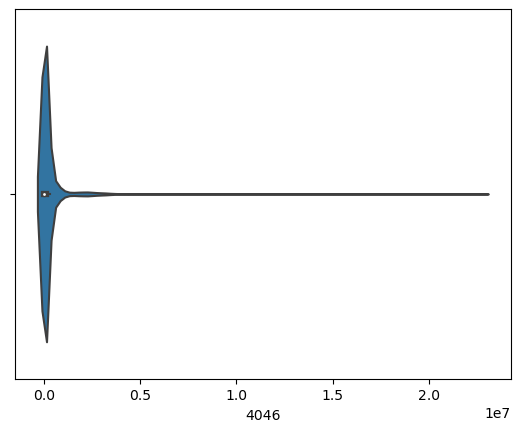

In [66]:
#visualizing the data in 4046
ax=sns.violinplot(x='4046', data=AV)
print(AV['4046'].value_counts())

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64


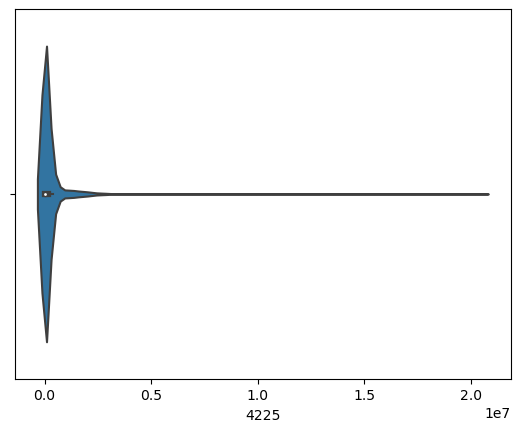

In [67]:
#visualizing the data in 4225
ax=sns.violinplot(x='4225', data=AV)
print(AV['4225'].value_counts())

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64


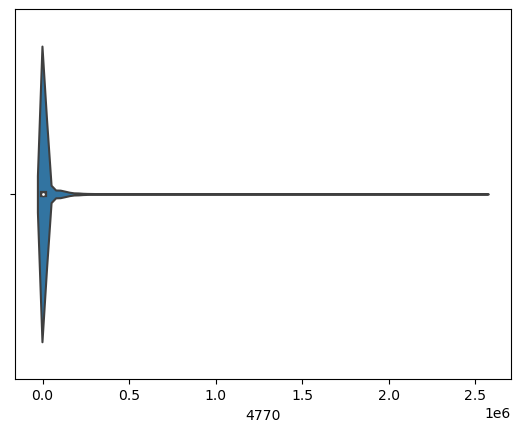

In [68]:
#visualizing the data in 4770
ax=sns.violinplot(x='4770', data=AV)
print(AV['4770'].value_counts())

0    9126
1    9123
Name: type, dtype: int64


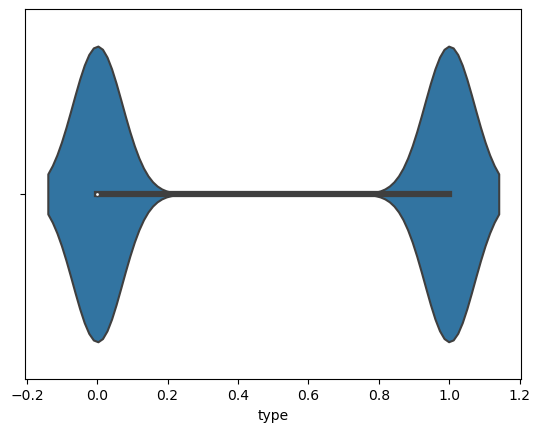

In [69]:
#visualizing the data in Type
ax=sns.violinplot(x='type', data=AV)
print(AV['type'].value_counts())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


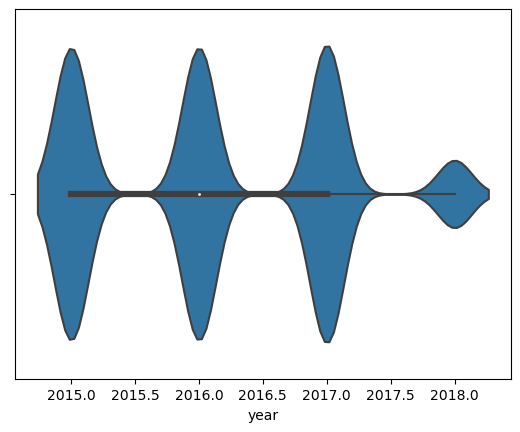

In [70]:
#visualizing the data in Year
ax=sns.violinplot(x='year', data=AV)
print(AV['year'].value_counts())

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64


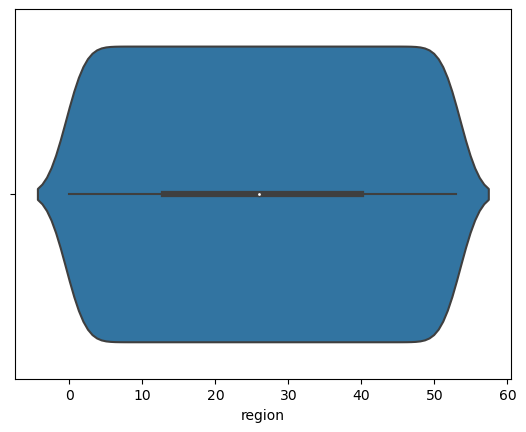

In [71]:
#visualizing the data in region
ax=sns.violinplot(x='region', data=AV)
print(AV['region'].value_counts())

# To find the average price, let's first work on the Linear Regression model 

Bivariant Analysis

Let's find the relation of each column with Average Price

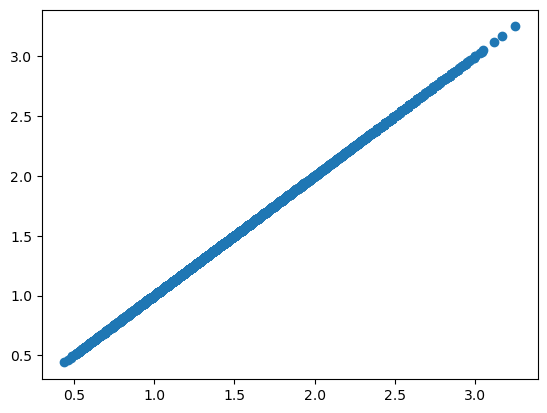

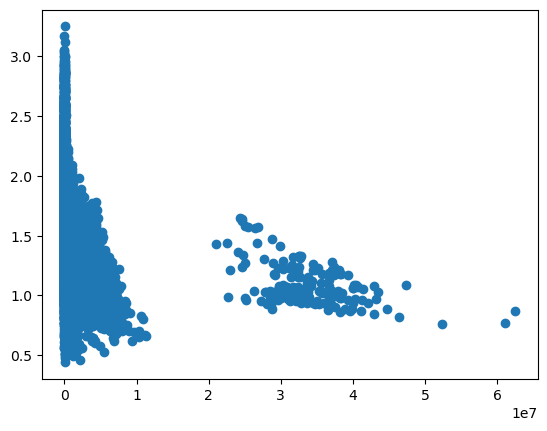

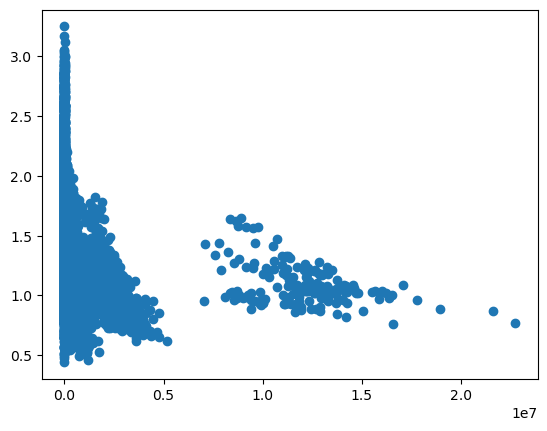

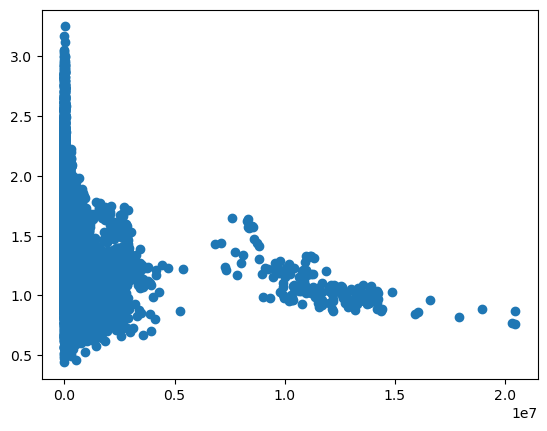

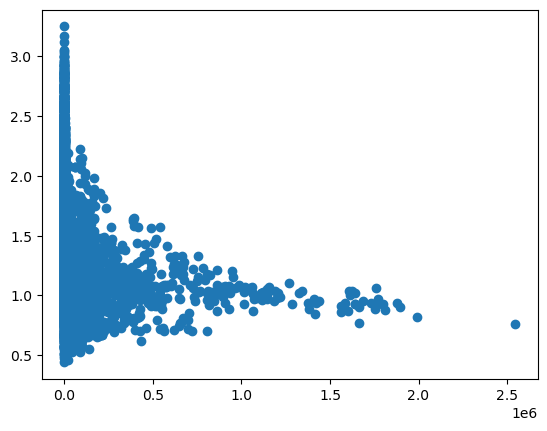

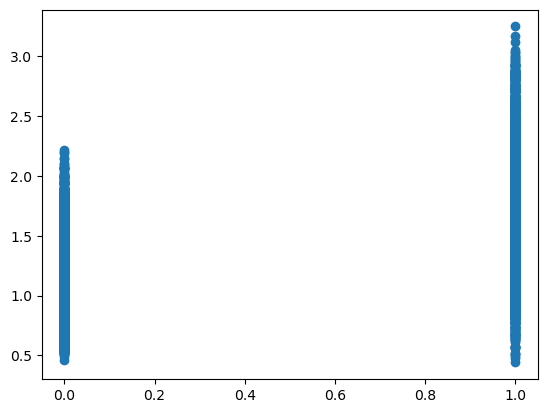

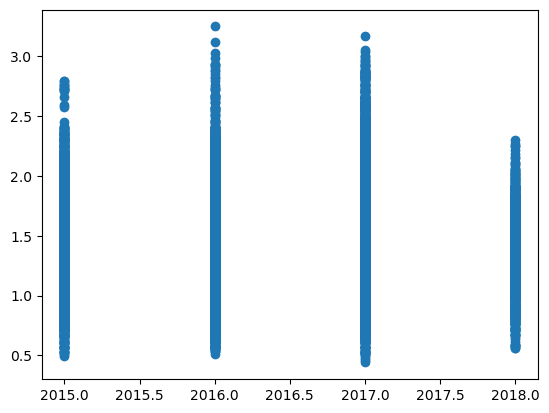

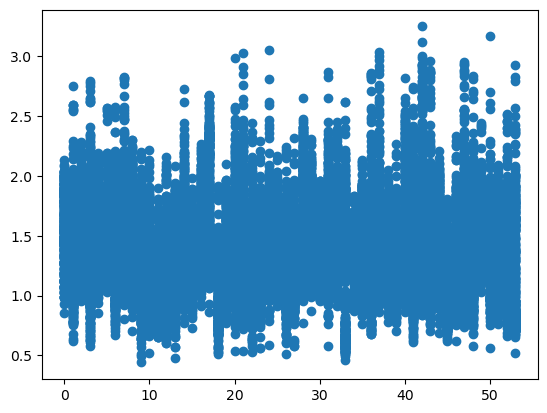

In [72]:
for i in AV.columns:
    plt.scatter(x=i, y='AveragePrice', data=AV)
    plt.show() 


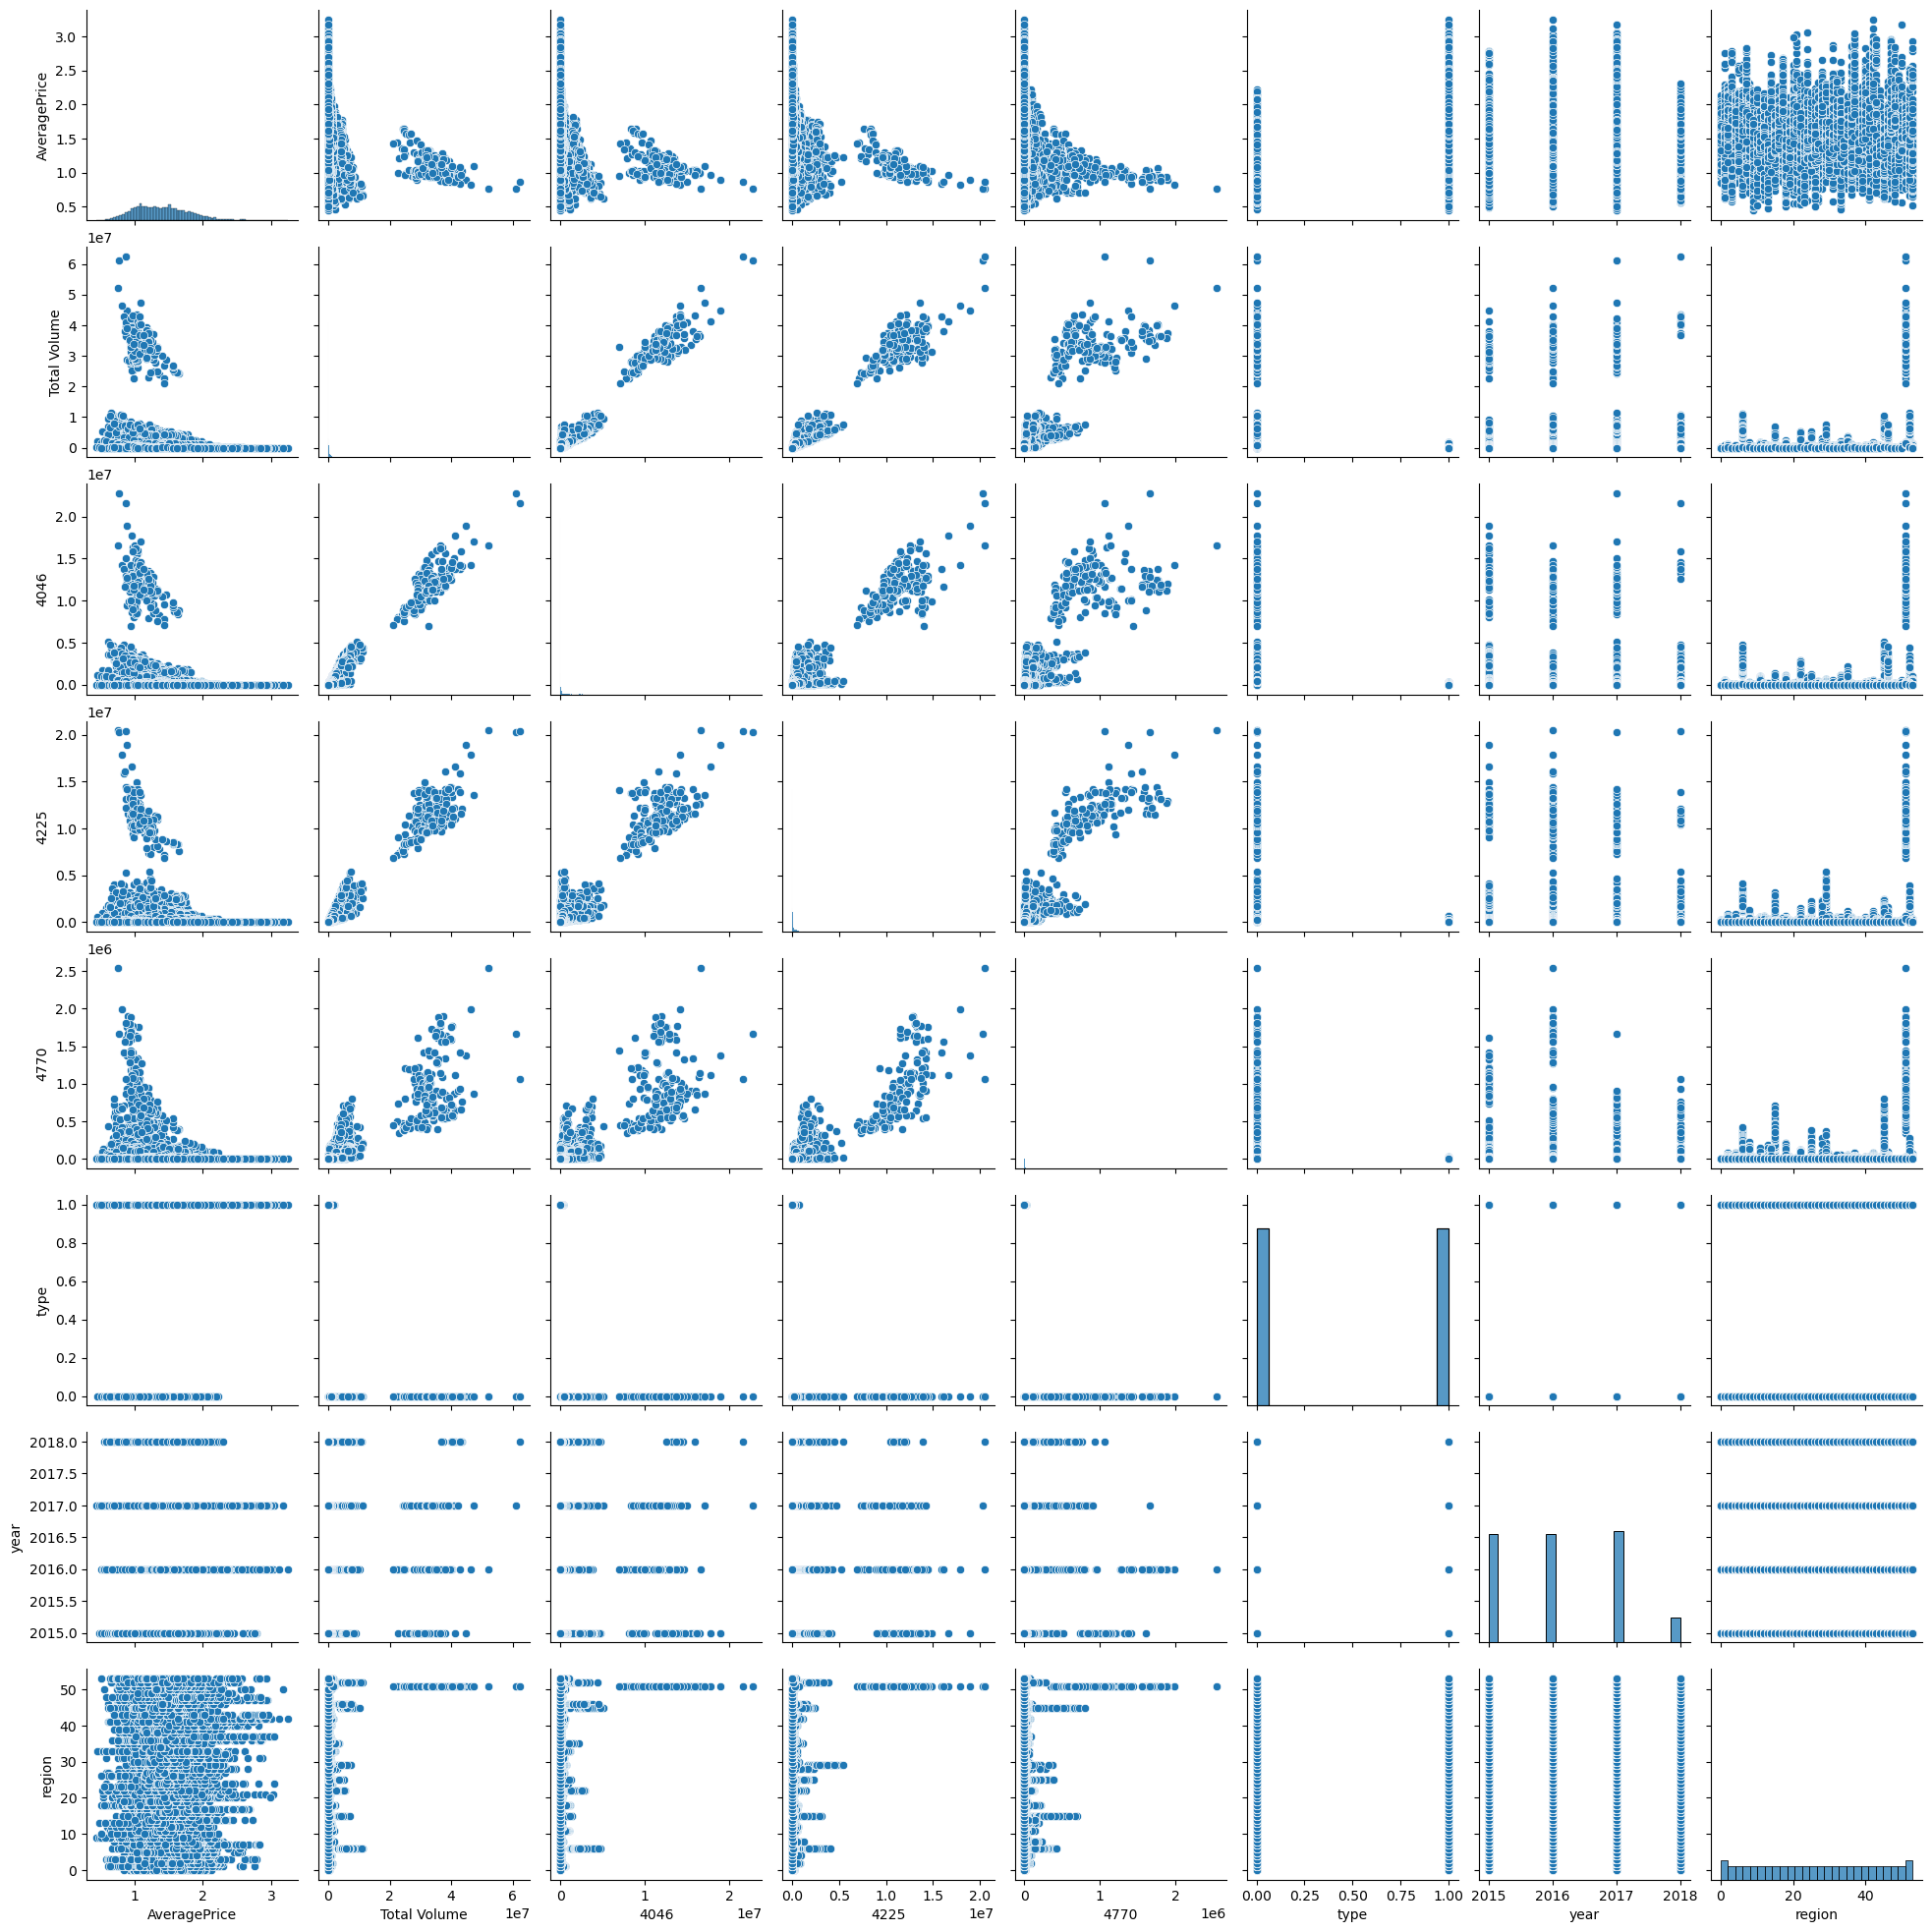

In [73]:
sns.pairplot(AV)
plt.show()

In [74]:
corr=AV.corr()
corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   

                  type      year    region  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.232434  0.017193  0.174176  
4046         -0.225819  0.003353  0.192073  
4225         -0.232289 -0.009559  0.145726  
4770         -0.210027 -0.036531  0.095252  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

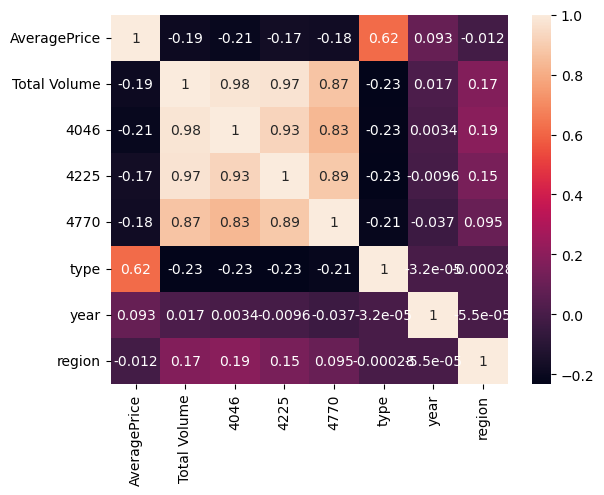

In [75]:
sns.heatmap(corr, annot=True)
plt.show()

Let's check for outliers

<AxesSubplot:>

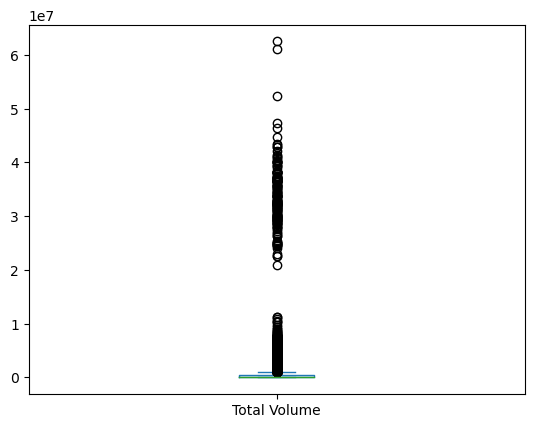

In [76]:
AV['Total Volume'].plot.box()
    

<AxesSubplot:>

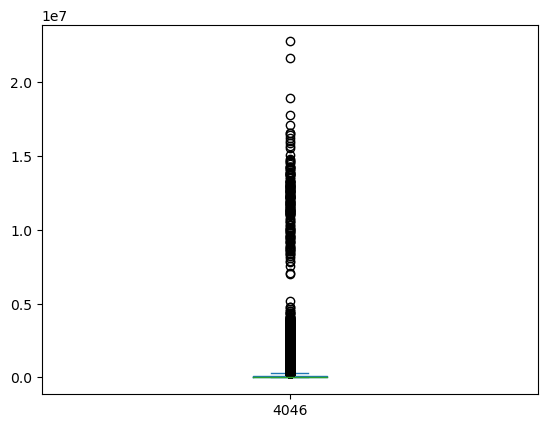

In [77]:
AV['4046'].plot.box()

<AxesSubplot:>

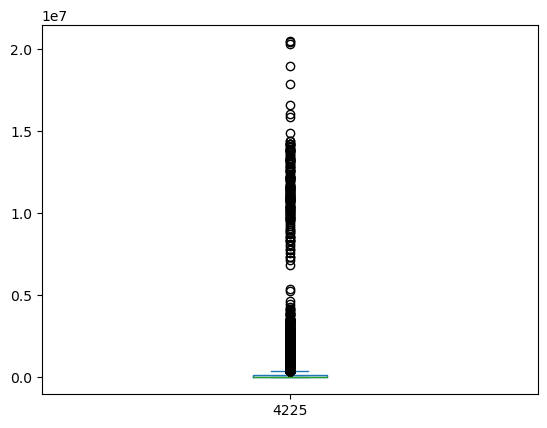

In [78]:
AV['4225'].plot.box()

<AxesSubplot:>

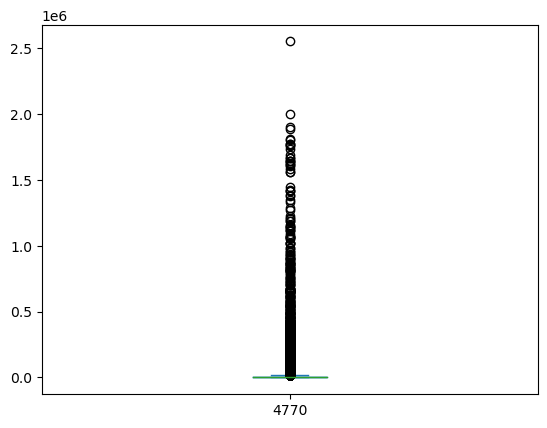

In [79]:
AV['4770'].plot.box()

<AxesSubplot:>

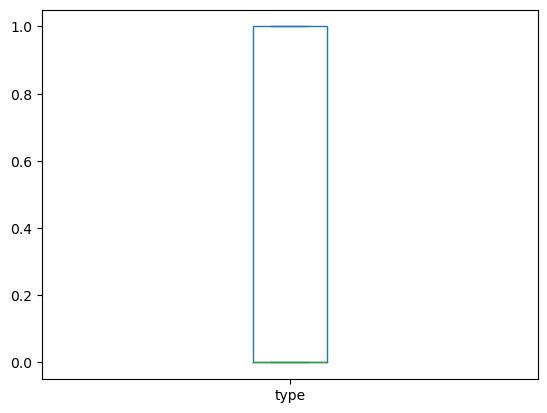

In [80]:
AV['type'].plot.box()

<AxesSubplot:>

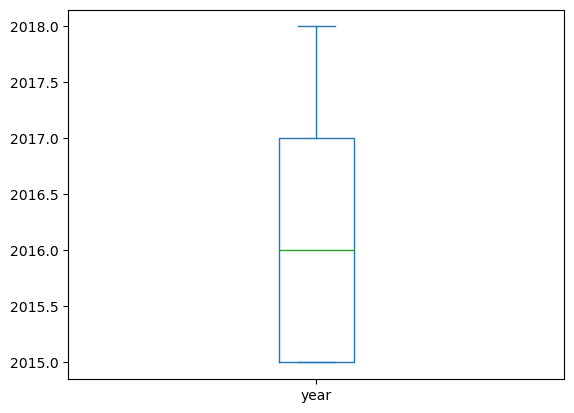

In [81]:
AV['year'].plot.box()

<AxesSubplot:>

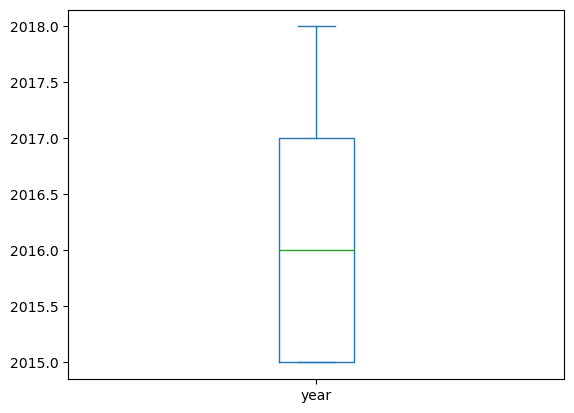

In [82]:
AV['year'].plot.box()

Let's Remove the outliers

In [83]:
df_av =AV.iloc[:,1:]
df_av

Total Volume     4046       4225    4770  type  year  region
0          64236.62  1036.74   54454.85   48.16     0  2015       0
1          54876.98   674.28   44638.81   58.33     0  2015       0
2         118220.22   794.70  109149.67  130.50     0  2015       0
3          78992.15  1132.00   71976.41   72.58     0  2015       0
4          51039.60   941.48   43838.39   75.78     0  2015       0
...             ...      ...        ...     ...   ...   ...     ...
18244      17074.83  2046.96    1529.20    0.00     1  2018      53
18245      13888.04  1191.70    3431.50    0.00     1  2018      53
18246      13766.76  1191.92    2452.79  727.94     1  2018      53
18247      16205.22  1527.63    2981.04  727.01     1  2018      53
18248      17489.58  2894.77    2356.13  224.53     1  2018      53

[18249 rows x 7 columns]

In [84]:
z = np.abs(zscore(df_av))

In [85]:
Threshold= 3
print(np.where(z>3))

(array([ 346,  359,  783,  787,  788,  790,  791,  792,  794,  795,  796,
        797,  799,  803,  805,  807,  808,  809,  812,  816,  820,  823,
        827, 1334, 1347, 1516, 1518, 1541, 2340, 2341, 2348, 2351, 2368,
       2370, 2652, 2652, 2652, 2652, 2653, 2653, 2653, 2653, 2654, 2654,
       2654, 2654, 2655, 2655, 2655, 2655, 2656, 2656, 2656, 2656, 2657,
       2657, 2657, 2657, 2658, 2658, 2658, 2658, 2659, 2659, 2659, 2659,
       2660, 2660, 2660, 2660, 2661, 2661, 2661, 2661, 2662, 2662, 2662,
       2662, 2663, 2663, 2663, 2663, 2664, 2664, 2664, 2664, 2665, 2665,
       2665, 2665, 2666, 2666, 2666, 2666, 2667, 2667, 2667, 2667, 2668,
       2668, 2668, 2668, 2669, 2669, 2669, 2669, 2670, 2670, 2670, 2670,
       2671, 2671, 2671, 2671, 2672, 2672, 2672, 2672, 2673, 2673, 2673,
       2673, 2674, 2674, 2674, 2674, 2675, 2675, 2675, 2675, 2676, 2676,
       2676, 2676, 2677, 2677, 2677, 2677, 2678, 2678, 2678, 2678, 2679,
       2679, 2679, 2679, 2680, 2680, 2680, 2680, 2

In [86]:
df= AV[(z<3).all(axis=1)]
df

AveragePrice  Total Volume     4046       4225    4770  type  year  \
0              1.33      64236.62  1036.74   54454.85   48.16     0  2015   
1              1.35      54876.98   674.28   44638.81   58.33     0  2015   
2              0.93     118220.22   794.70  109149.67  130.50     0  2015   
3              1.08      78992.15  1132.00   71976.41   72.58     0  2015   
4              1.28      51039.60   941.48   43838.39   75.78     0  2015   
...             ...           ...      ...        ...     ...   ...   ...   
18244          1.63      17074.83  2046.96    1529.20    0.00     1  2018   
18245          1.71      13888.04  1191.70    3431.50    0.00     1  2018   
18246          1.87      13766.76  1191.92    2452.79  727.94     1  2018   
18247          1.93      16205.22  1527.63    2981.04  727.01     1  2018   
18248          1.62      17489.58  2894.77    2356.13  224.53     1  2018   

       region  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
18244      53  
18245      53  
18246      53  
18247      53  
18248      53  

[17969 rows x 8 columns]

In [87]:
df.skew()

AveragePrice    0.567712
Total Volume    3.675886
4046            4.439655
4225            4.120150
4770            4.778182
type           -0.030837
year            0.212216
region          0.005095
dtype: float64

In [88]:
#lets treat the skewness in the input dataset

for index in df.skew().index:
    if index != 'AveragePrice':
        if df.skew().loc[index] > 0.5:
            df[index] = np.log1p(df[index])
        if df.skew().loc[index] < -0.5:
            df[index] = np.square(df[index])

In [89]:
#Lets again check the skewness
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

AveragePrice    0.567712
Total Volume   -0.018307
4046           -0.392449
4225            0.125836
4770            0.071812
type           -0.030837
year            0.212216
region          0.005095
dtype: float64
Total count of numeric features:  8
count of features which are significantly skewed:  1


In [90]:
x=df.iloc[:,1:]
x

Total Volume      4046        4225      4770  type  year  region
0         11.070344  6.944801  118.922200  3.895080     0  2015       0
1         10.912867  6.515127  114.626601  4.083115     0  2015       0
2         11.680313  6.679222  134.571241  4.879007     0  2015       0
3         11.277116  7.032624  125.084263  4.298373     0  2015       0
4         10.840377  6.848515  114.239501  4.340944     0  2015       0
...             ...       ...         ...       ...   ...   ...     ...
18244      9.745419  7.624599   53.775144  0.000000     1  2018      53
18245      9.538855  7.083975   66.276600  0.000000     1  2018      53
18246      9.530085  7.084159   60.924098  6.591591     1  2018      53
18247      9.693150  7.332127   64.005807  6.590315     1  2018      53
18248      9.769418  7.971006   60.298332  5.418453     1  2018      53

[17969 rows x 7 columns]

In [91]:
y=df.iloc[:,0]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17969, dtype: float64

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=62) #spliting the data for fit and predict method


In [93]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [94]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [95]:
model.coef_

array([-0.47625105,  0.05829595,  0.31630081,  0.02194659,  0.16087798,
        0.07655819,  0.01009074])

In [96]:
model.intercept_

1.4102194307521105

In [97]:
model.score(x_train,y_train)

0.47970090453645065

In [98]:
y_pred = model.predict(x_test)

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error: 0.2230302284944895
Mean Squared Error: 0.08308711060649722
Root Mean Squared Error: 0.28824834883568234
R-squared (R²): 0.4869771200550719


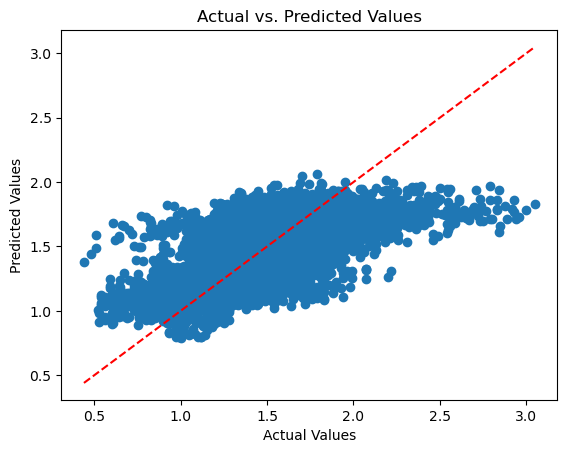

In [100]:
#Visual representation of the model
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [102]:
lasso = Lasso(alpha=0.1)

In [104]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
alpha_values = [0.001, 0.01, 0.1, 1, 10]
best_alpha = None
best_mse = float('inf')

In [105]:
for alpha in alpha_values:
    lasso.alpha = alpha
    mse_scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring=mse_scorer)
    average_mse = -np.mean(mse_scores)
    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha = alpha

In [106]:
# Fit the model with the best alpha
lasso.alpha = best_alpha
lasso.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Optimal Lasso Alpha: {best_alpha}")
print(f"Test Mean Squared Error: {mse:.2f}")


Optimal Lasso Alpha: 0.001
Test Mean Squared Error: 0.08


# Saving the model

In [107]:
import joblib
joblib.dump(lasso.fit,'Avocado.joblib')

['Avocado.joblib']

# Now, let's focus on Region and work on Classification model

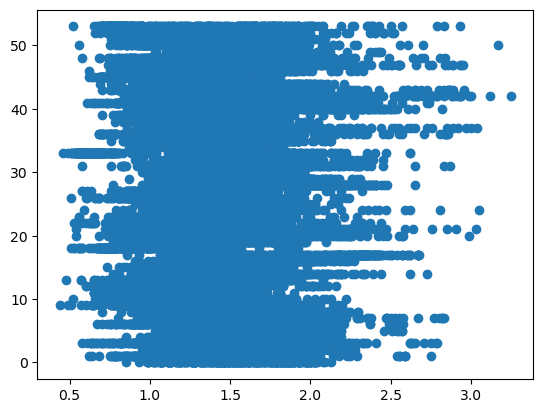

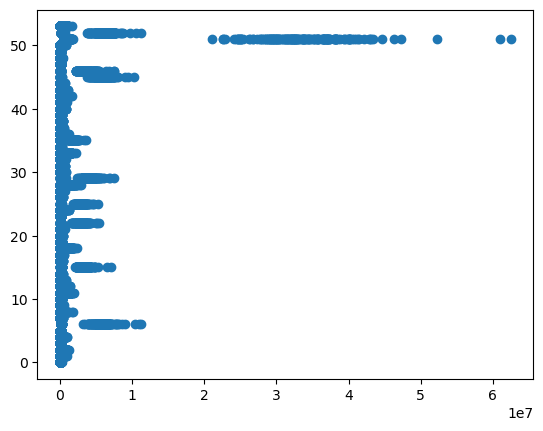

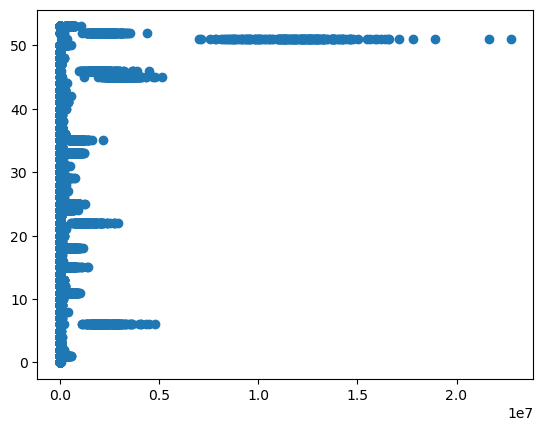

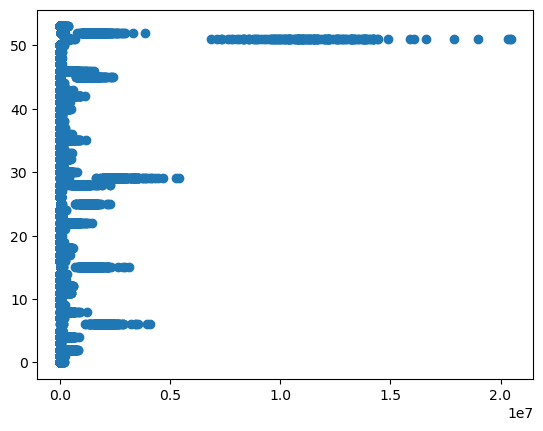

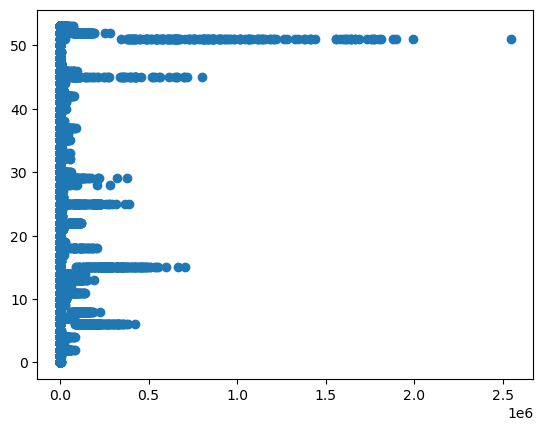

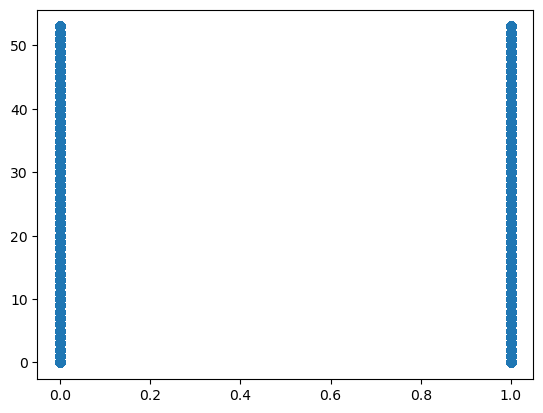

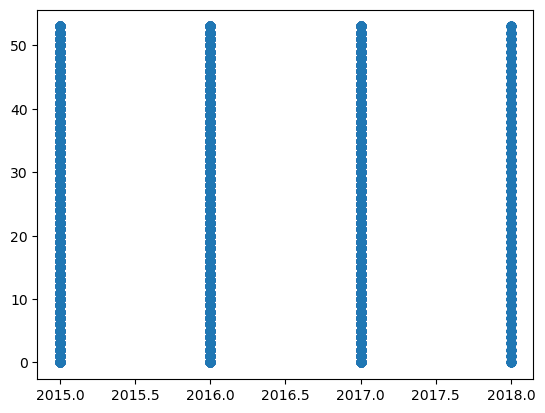

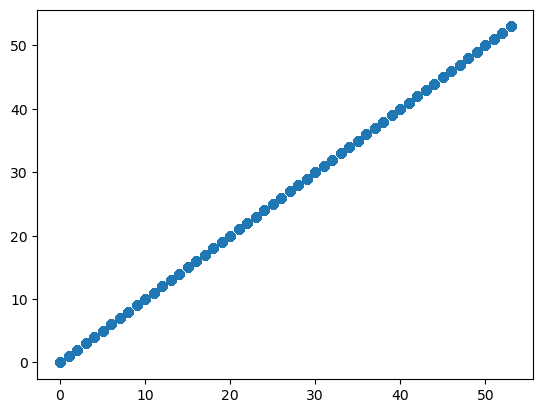

In [108]:
for i in AV.columns:
    plt.scatter(x=i, y='region', data=AV)
    plt.show() 


In [109]:
ds= AV.iloc[:,0:-1]
ds

AveragePrice  Total Volume     4046       4225    4770  type  year
0              1.33      64236.62  1036.74   54454.85   48.16     0  2015
1              1.35      54876.98   674.28   44638.81   58.33     0  2015
2              0.93     118220.22   794.70  109149.67  130.50     0  2015
3              1.08      78992.15  1132.00   71976.41   72.58     0  2015
4              1.28      51039.60   941.48   43838.39   75.78     0  2015
...             ...           ...      ...        ...     ...   ...   ...
18244          1.63      17074.83  2046.96    1529.20    0.00     1  2018
18245          1.71      13888.04  1191.70    3431.50    0.00     1  2018
18246          1.87      13766.76  1191.92    2452.79  727.94     1  2018
18247          1.93      16205.22  1527.63    2981.04  727.01     1  2018
18248          1.62      17489.58  2894.77    2356.13  224.53     1  2018

[18249 rows x 7 columns]

let's check for the outliers

In [110]:
z_ = np.abs(zscore(ds))
z_

AveragePrice  Total Volume      4046      4225      4770      type  \
0          0.188689      0.227716  0.230816  0.199902  0.212091  0.999836   
1          0.139020      0.230427  0.231103  0.208054  0.211997  0.999836   
2          1.182069      0.212085  0.231007  0.154478  0.211325  0.999836   
3          0.809551      0.223444  0.230741  0.185350  0.211864  0.999836   
4          0.312861      0.231538  0.230891  0.208719  0.211834  0.999836   
...             ...           ...       ...       ...       ...       ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540  1.000164   
18245      0.755023      0.242296  0.230693  0.242277  0.212540  1.000164   
18246      1.152375      0.242331  0.230693  0.243090  0.205766  1.000164   
18247      1.301382      0.241625  0.230428  0.242651  0.205774  1.000164   
18248      0.531512      0.241253  0.229347  0.243170  0.210450  1.000164   

           year  
0      1.221282  
1      1.221282  
2      1.221282  
3      1.221282  
4      1.221282  
...         ...  
18244  1.970504  
18245  1.970504  
18246  1.970504  
18247  1.970504  
18248  1.970504  

[18249 rows x 7 columns]

In [111]:
Threshold= 3
print(np.where(z_>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [112]:
ds_new = AV[(z_<3).all(axis=1)]
ds_new

AveragePrice  Total Volume     4046       4225    4770  type  year  \
0              1.33      64236.62  1036.74   54454.85   48.16     0  2015   
1              1.35      54876.98   674.28   44638.81   58.33     0  2015   
2              0.93     118220.22   794.70  109149.67  130.50     0  2015   
3              1.08      78992.15  1132.00   71976.41   72.58     0  2015   
4              1.28      51039.60   941.48   43838.39   75.78     0  2015   
...             ...           ...      ...        ...     ...   ...   ...   
18244          1.63      17074.83  2046.96    1529.20    0.00     1  2018   
18245          1.71      13888.04  1191.70    3431.50    0.00     1  2018   
18246          1.87      13766.76  1191.92    2452.79  727.94     1  2018   
18247          1.93      16205.22  1527.63    2981.04  727.01     1  2018   
18248          1.62      17489.58  2894.77    2356.13  224.53     1  2018   

       region  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
18244      53  
18245      53  
18246      53  
18247      53  
18248      53  

[17838 rows x 8 columns]

In [113]:
ds_new.skew()

AveragePrice    0.385429
Total Volume    3.661159
4046            4.422120
4225            4.104196
4770            4.759495
type           -0.016371
year            0.221195
region          0.012062
dtype: float64

In [114]:
for index in ds_new.skew().index:
    if index != 'region':
        if ds_new.skew().loc[index] > 0.5:
            ds_new[index] = np.log1p(ds_new[index])
        if ds_new.skew().loc[index] < -0.5:
            ds_new[index] = np.square(ds_new[index])

In [115]:
#Lets again check the skewness
print(ds_new.skew())
print("Total count of numeric features: ",len(ds_new.skew()))
print("count of features which are significantly skewed: ",len(ds_new.skew().loc[abs(ds_new.skew())>0.5]))

AveragePrice    0.385429
Total Volume   -0.029027
4046           -0.403825
4225            0.115663
4770            0.061281
type           -0.016371
year            0.221195
region          0.012062
dtype: float64
Total count of numeric features:  8
count of features which are significantly skewed:  0


In [116]:
x=ds_new.iloc[:,0:-1]
x

AveragePrice  Total Volume      4046        4225      4770  type  year
0              1.33     11.070344  6.944801  118.922200  3.895080     0  2015
1              1.35     10.912867  6.515127  114.626601  4.083115     0  2015
2              0.93     11.680313  6.679222  134.571241  4.879007     0  2015
3              1.08     11.277116  7.032624  125.084263  4.298373     0  2015
4              1.28     10.840377  6.848515  114.239501  4.340944     0  2015
...             ...           ...       ...         ...       ...   ...   ...
18244          1.63      9.745419  7.624599   53.775144  0.000000     1  2018
18245          1.71      9.538855  7.083975   66.276600  0.000000     1  2018
18246          1.87      9.530085  7.084159   60.924098  6.591591     1  2018
18247          1.93      9.693150  7.332127   64.005807  6.590315     1  2018
18248          1.62      9.769418  7.971006   60.298332  5.418453     1  2018

[17838 rows x 7 columns]

In [117]:
y=ds_new.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17838, dtype: int32

In [118]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
knb= KNeighborsClassifier()

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=58)

In [122]:
knb.fit(x_train,y_train)
knbpred=knb.predict(x_test)

In [123]:
knbpred

array([53, 39, 32, ..., 12, 21, 15])

In [124]:
print(accuracy_score(y_test,knbpred))

0.6762892376681614


K neighbours isn't giving the best accuracy score so trying a different model

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=58)

In [126]:
x_train.shape , x_test.shape

((14270, 7), (3568, 7))

In [127]:
y_train.shape , y_test.shape

((14270,), (3568,))

In [128]:
dtc = DecisionTreeClassifier()

In [129]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [130]:
pred =dtc.predict(x_test)
pred

array([53, 39, 32, ..., 41, 21, 15])

In [131]:
print(accuracy_score(y_test,pred))

0.757847533632287


In [132]:
print(confusion_matrix(y_test,pred))

[[53  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  2]
 [ 0  0 45 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  1  0 ...  0  0 48]]


<AxesSubplot:>

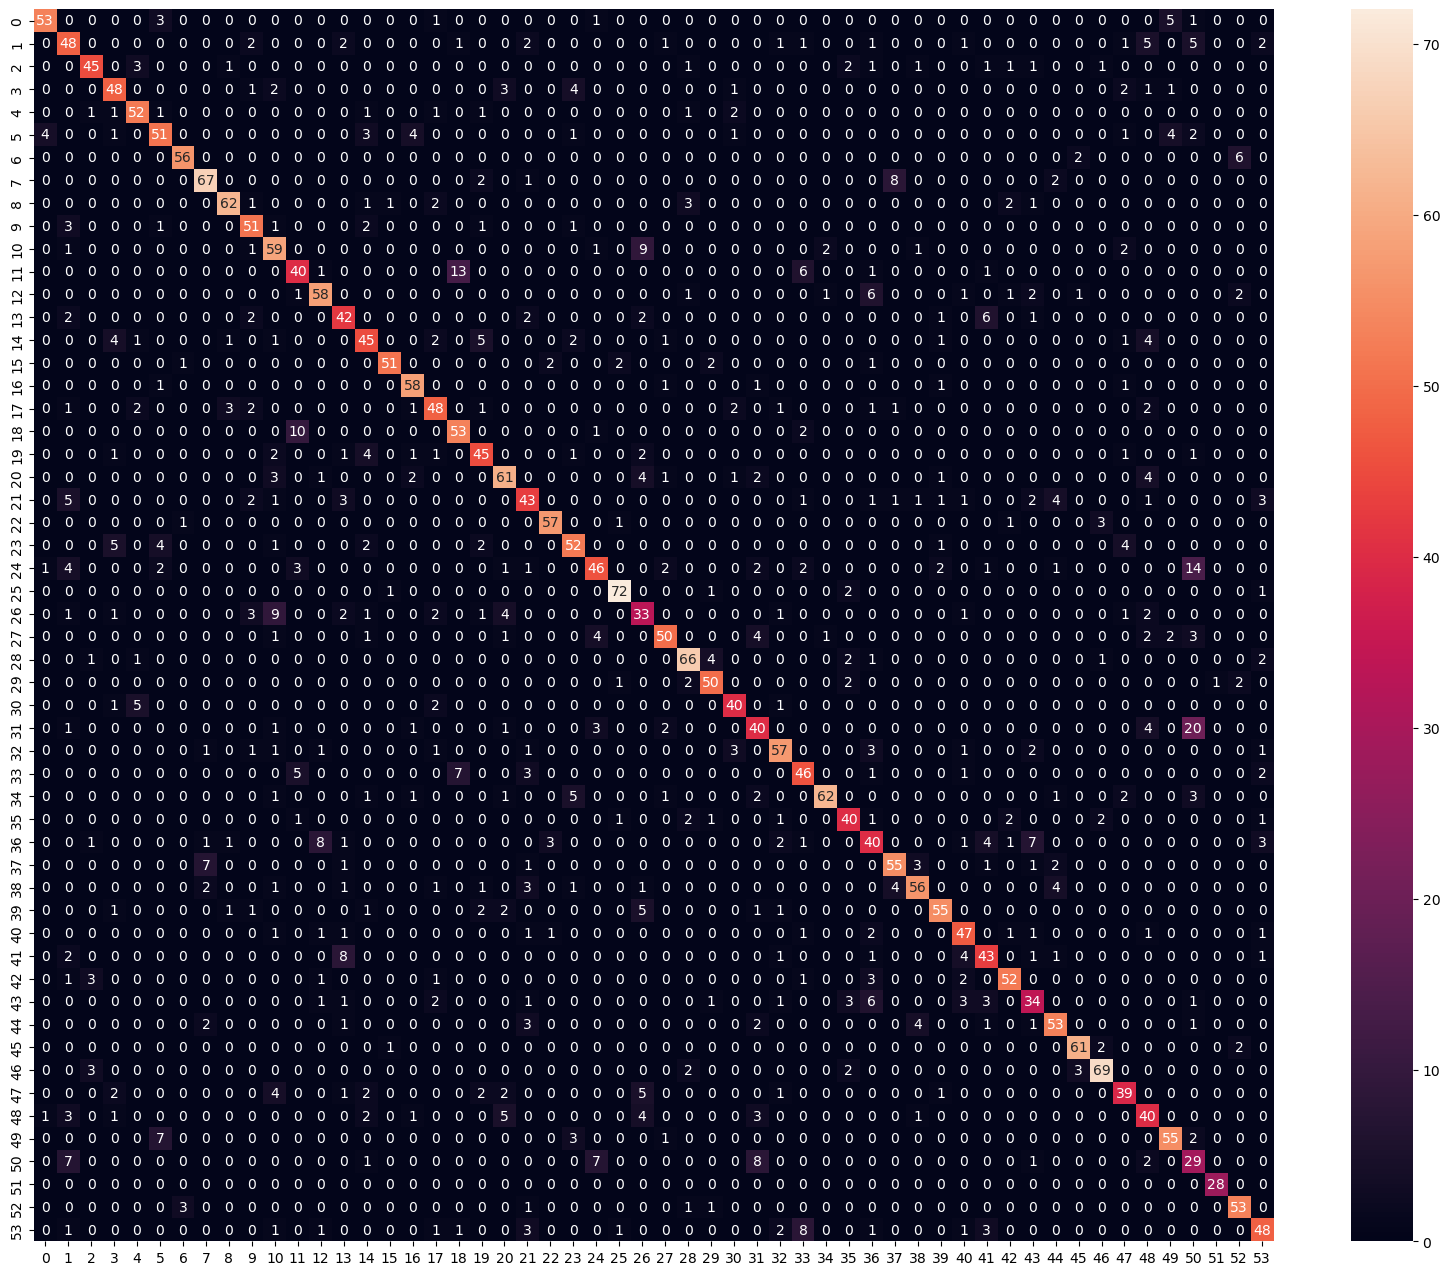

In [134]:
plt.figure(figsize=(20,16))
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [133]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.60      0.66      0.63        73
           2       0.83      0.78      0.80        58
           3       0.73      0.76      0.74        63
           4       0.81      0.85      0.83        61
           5       0.73      0.71      0.72        72
           6       0.92      0.88      0.90        64
           7       0.84      0.84      0.84        80
           8       0.90      0.85      0.87        73
           9       0.76      0.85      0.80        60
          10       0.66      0.78      0.71        76
          11       0.67      0.65      0.66        62
          12       0.79      0.78      0.79        74
          13       0.65      0.72      0.68        58
          14       0.67      0.66      0.67        68
          15       0.94      0.86      0.90        59
          16       0.84      0.92      0.88        63
          17       0.74    

# Saving the model

In [136]:
import joblib
joblib.dump(dtc.fit,'Avocado1.joblib')

['Avocado1.joblib']

# HR Analytics

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [138]:
hr = pd.read_csv("C:/Users/vaddi/Downloads/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [139]:
#Lets check if there are any null values 
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here we can see that the dataset has no nullvalues

<AxesSubplot:>

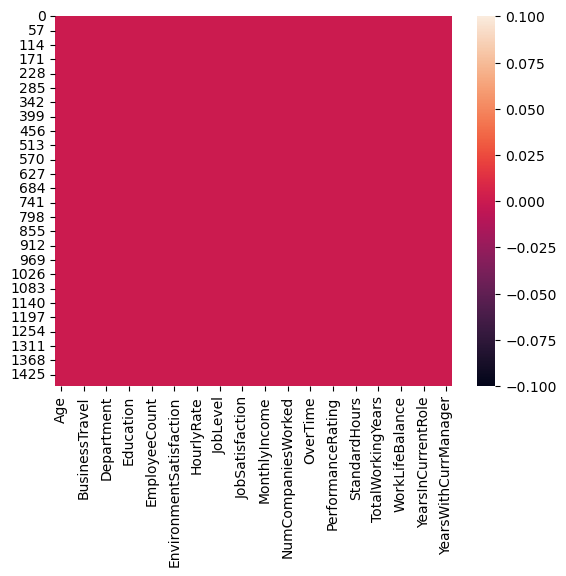

In [140]:
#Data visualization of the null values present in the dataset
sns.heatmap(hr.isnull())

Here, in the data visualization we can see that the dataset has no null values present

In [141]:
#Lets check the data types
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here, we can observe that the dataset contains the coulmns with object and int data types

In [142]:
#Let's drop the 'Employee number' column in the dataset.
hr.drop(columns =["EmployeeNumber"],inplace=True)

Also, let's checl for the unique values in each column, to see if we can remove any further columns or unwanted data from the dataset

In [143]:
for i in hr.columns:
    print("Unique values in ", i, hr[i].unique())
    print("\n")

Unique values in  Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Unique values in  Attrition ['Yes' 'No']


Unique values in  BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Unique values in  DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 10

It is observed that 'EmployeeCount', 'Over18' and 'StandardHours' has single values, so lets remove these columns

In [144]:
list1 = ['EmployeeCount', 'Over18', 'StandardHours']
hr.drop(list1,axis=1, inplace= True)

# Data Visualization

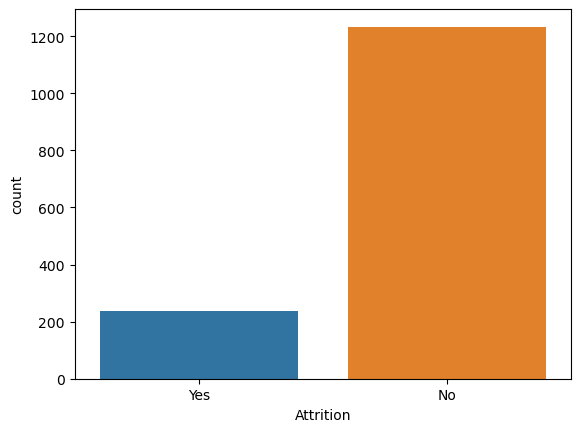

In [145]:
#Let's visualize the data in 'Attrition'
sns.countplot(x='Attrition', data=hr)
plt.show()

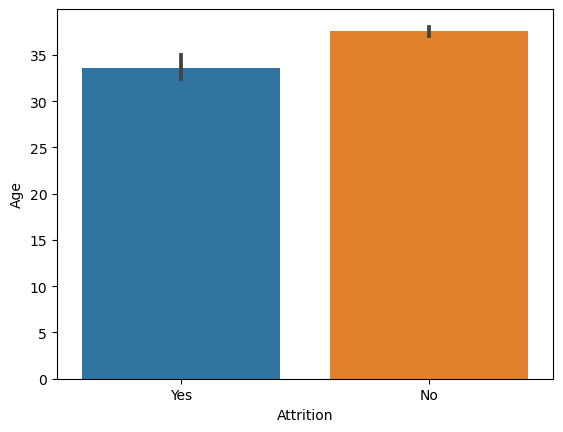

In [146]:
#Let's compare the data in 'Attrition' and 'Age' 
sns.barplot(x='Attrition',y='Age', data=hr)
plt.show()

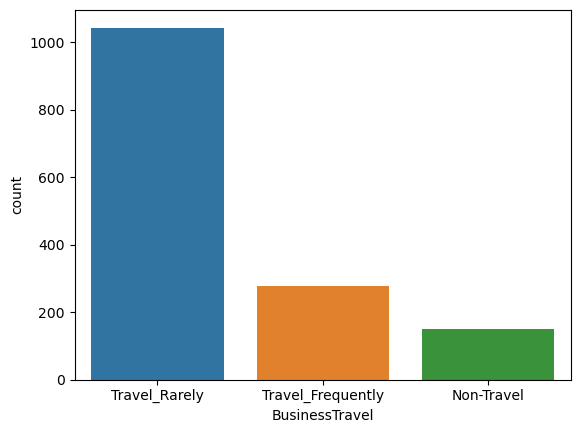

In [147]:
#Let's visualize the data in 'Business Travel'
sns.countplot(x='BusinessTravel', data=hr)
plt.show()

It is observed that the most of the employess travel rarely.

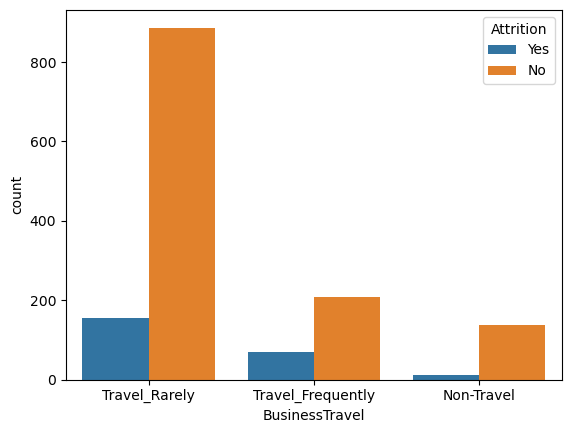

In [148]:
 #Let's compare between 'Attrition' and 'Business Travel'
sns.countplot(x='BusinessTravel', data=hr, hue='Attrition')
plt.show()
    

IT is observed that the propotion of attrition is higher where travel is frequent.

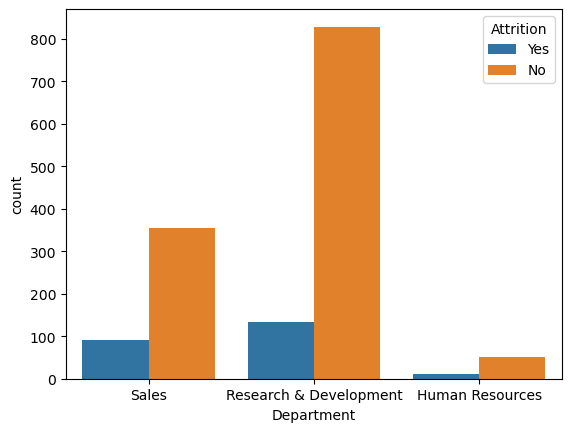

In [149]:
#Let's compare the relation betweeb 'Department' and 'Attrition'
sns.countplot(x='Department', data=hr, hue='Attrition')
plt.show()

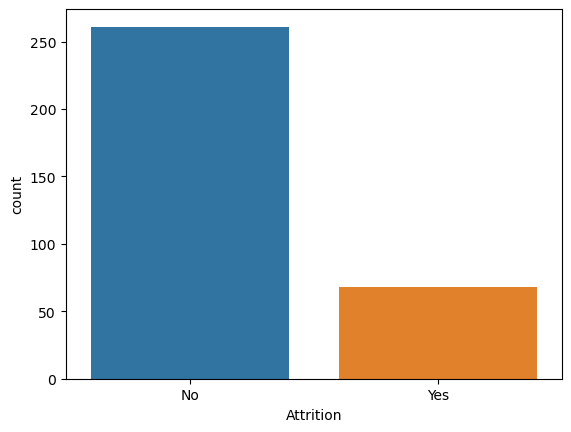

In [150]:
#lets chcek when distance from home is above 15 kms whats the attrition
sns.countplot(x="Attrition",data=hr.loc[hr["DistanceFromHome"]>15])
plt.show()

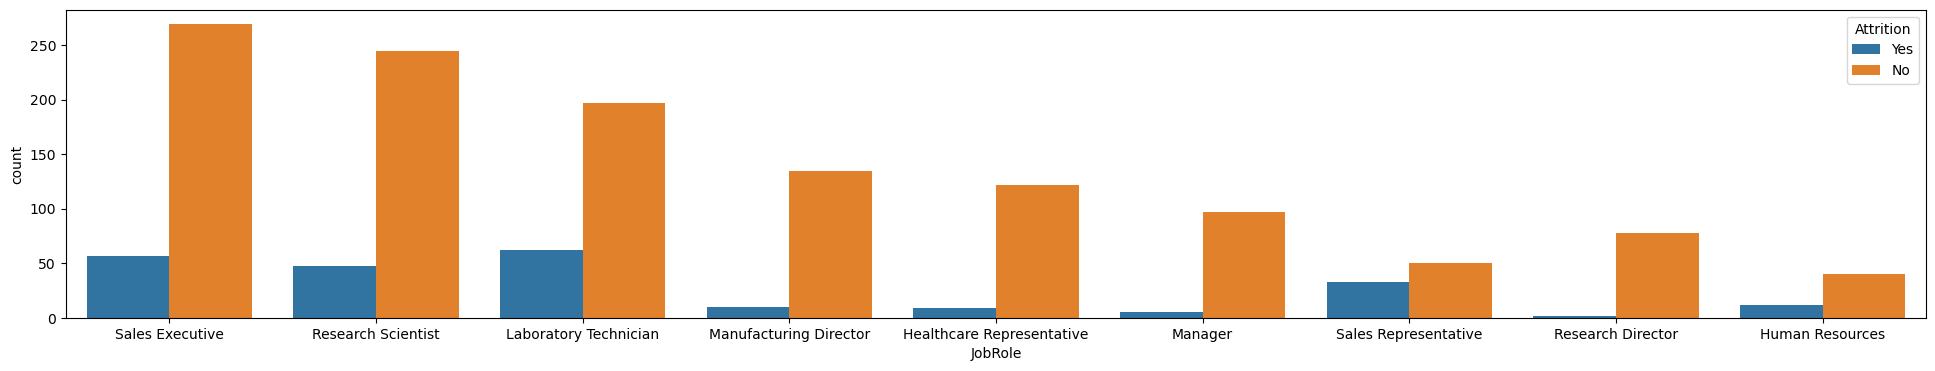

In [151]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=hr,hue="Attrition")
plt.show()


so we can analyse the attrition ratio in each category and take corrective actions by understanding the reason behind the attrition

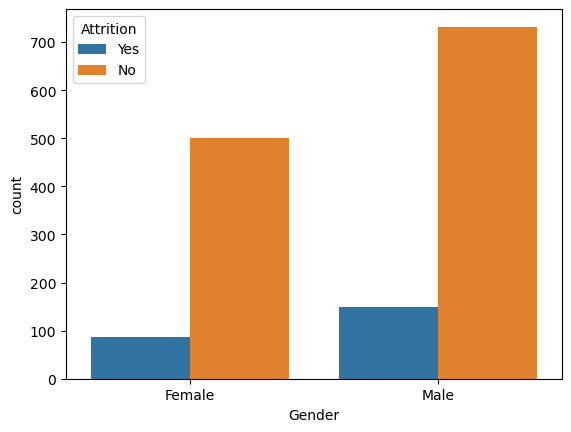

In [152]:
#lets chcek the attrition ratio based on gender
sns.countplot(x="Gender",data=hr,hue="Attrition")
plt.show()

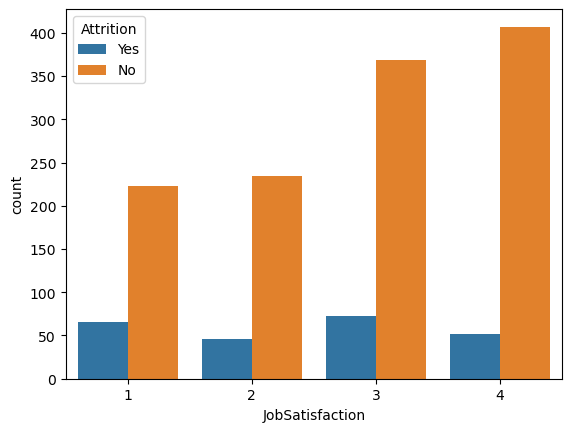

In [153]:
#lets analyse the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=hr,hue="Attrition")
plt.show()


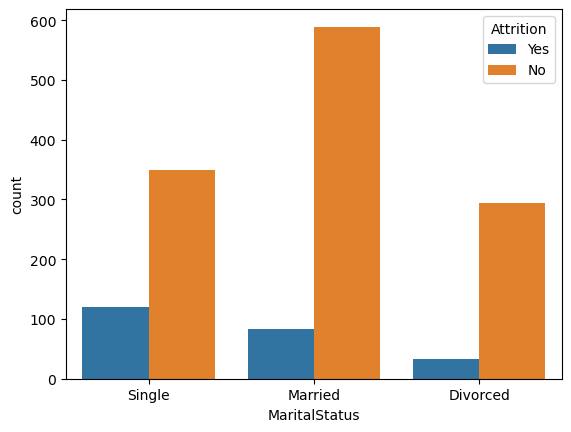

In [154]:
#Lets analyse the attrition ratio in MaritalStatus
sns.countplot(x="MaritalStatus",data= hr,hue="Attrition")
plt.show()


The ratio is high on singles

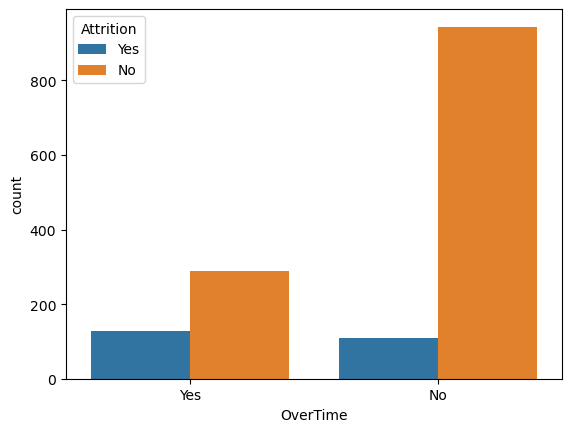

In [155]:
#Lets compare the proportion of attrition based on overtime
sns.countplot(x="OverTime",data=hr,hue="Attrition")
plt.show()


It clearly shows if overtime is there then attrition proportion is higher

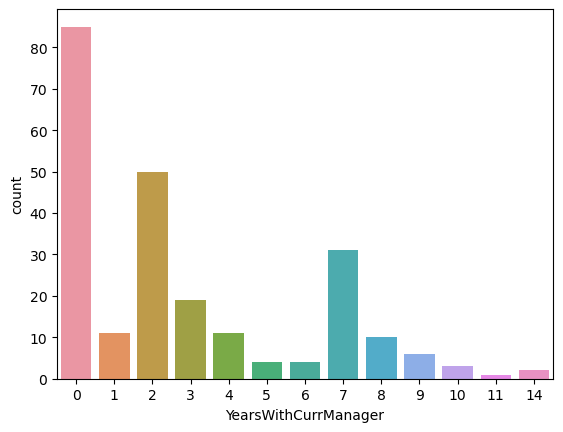

In [156]:
#Let's compare the relation between 'YearsWithCurrentManager' and Attrition value yes
sns.countplot(x="YearsWithCurrManager",data=hr.loc[hr["Attrition"]=="Yes"])
plt.show()


Here we came to know that if years working wth current manager is 0 then attrition was very high
Also after 2 years of working significant amut of people left


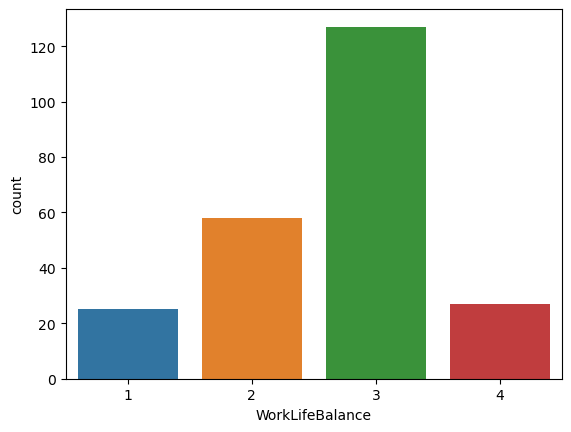

In [157]:
#lets analyse the work life balance with attrition value 'yes'
sns.countplot(x="WorkLifeBalance",data=hr.loc[hr["Attrition"]=="Yes"])
plt.show()

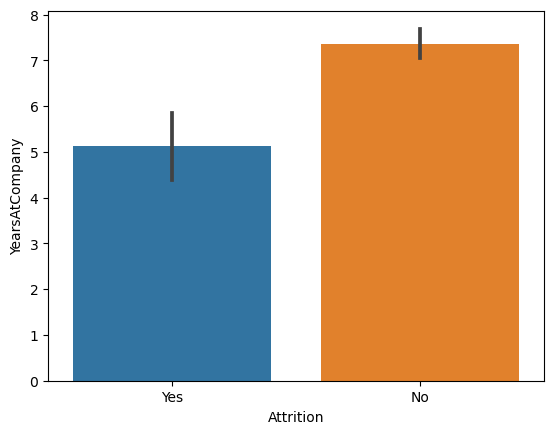

In [158]:
#Let's analyse the relation between average working years of the employee and Attrition
sns.barplot(x="Attrition",y="YearsAtCompany",data=hr)
plt.show()


Here we can see what is the average number of years employee stays in the company

In [159]:
#Lets check the time laped since  last promotion
hr.loc[hr["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})


Attrition
YearsSinceLastPromotion           
0                              110
1                               49
2                               27
3                                9
4                                5
5                                2
6                                6
7                               16
9                                4
10                               1
11                               2
13                               2
14                               1
15                               3

The majority almost half of people left not even single year passed since last promotion
We can conclude promotion is not the factor why people left the company 

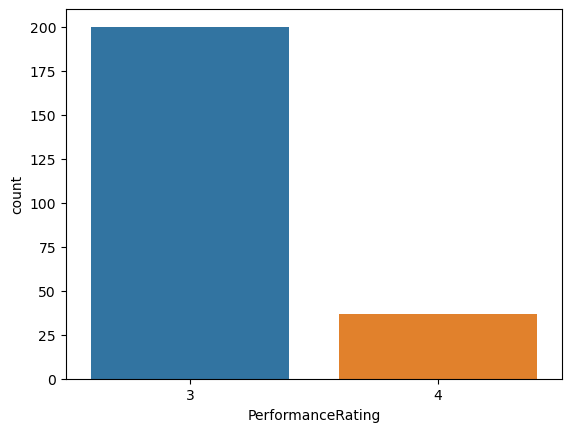

In [160]:
#Now lets compare how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data= hr.loc[hr["Attrition"]=="Yes"])
plt.show()


May be since they expect that their work deserves more rating and is undervalued
Almost all the people who left were who got rating 3

In [161]:
corr= hr.corr()
corr

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

<AxesSubplot:>

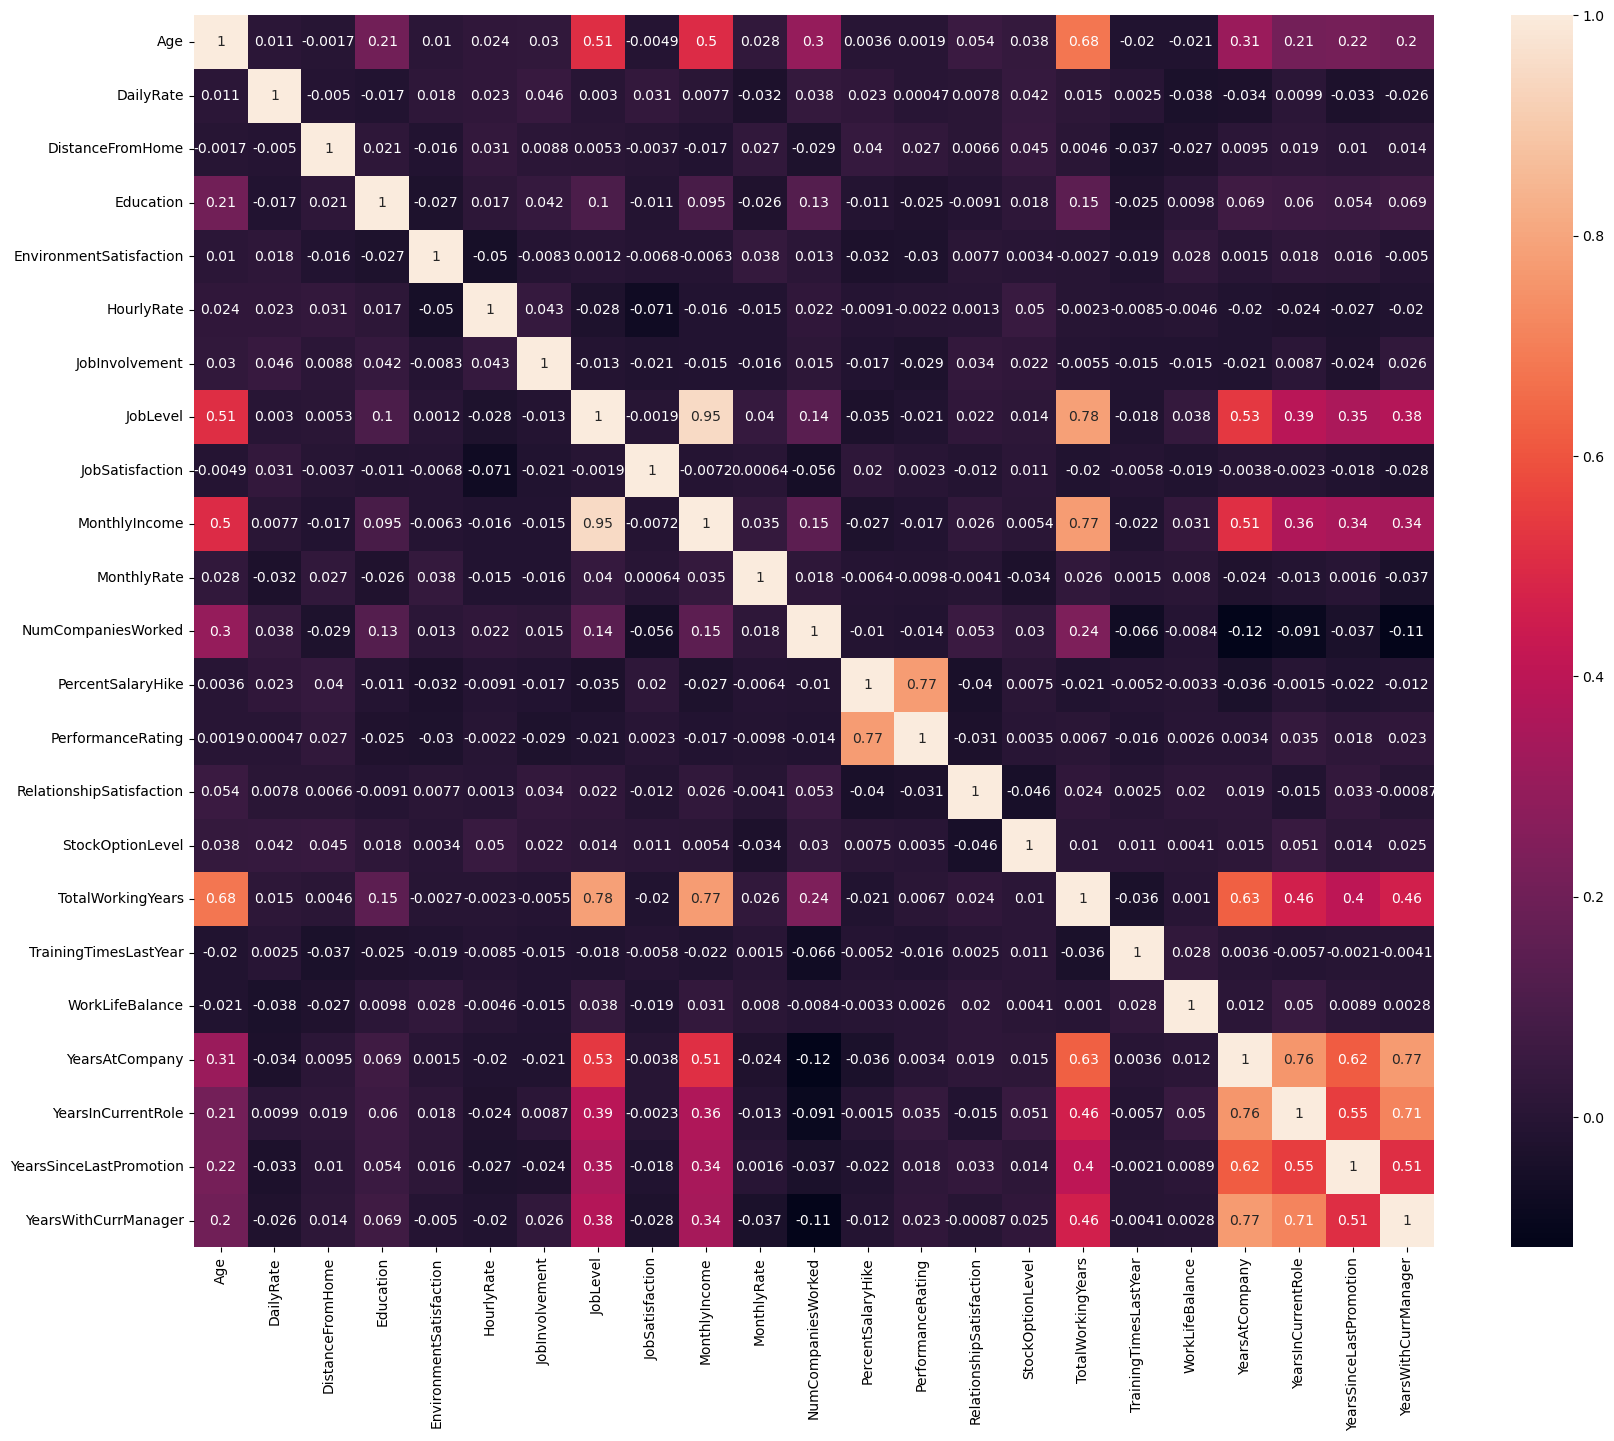

In [162]:
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True)

In [163]:
#lets check the skewness in the dataset
print(hr.skew())
print("Total count of numeric features: ",len(hr.skew()))
print("count of features which are significantly skewed: ",len(hr.skew().loc[abs(hr.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


In [164]:
#lets seprate the input and output column
x= hr.drop(columns=["Attrition"])
y= hr[["Attrition"]]

In [165]:
#lets treat the skewness in the input dataset

for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [166]:
#Lets again check the skewness
print(x.skew())
print("Total count of numeric features: ",len(x.skew()))
print("count of features which are significantly skewed: ",len(x.skew().loc[abs(x.skew())>0.5]))


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

In [167]:
#Lets count the number of columns of object datatype
print(x.dtypes.loc[x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


In [168]:
#we need to convert above columns to 1 and 0 using pd.get_dummies
df_x=pd.get_dummies(x,drop_first=True)

In [169]:
#lets see df_x
df_x

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102          0.693147          2                        2   
1      49        279          2.197225          1                        3   
2      37       1373          1.098612          2                        4   
3      33       1392          1.386294          4                        4   
4      27        591          1.098612          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884          3.178054          2                        3   
1466   39        613          1.945910          1                        4   
1467   27        155          1.609438          3                        2   
1468   49       1023          1.098612          3                        4   
1469   34        628          2.197225          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3  1.098612                4       8.698514   
1             61               2  1.098612                2       8.543056   
2             92               2  0.693147                3       7.645398   
3             56               3  0.693147                3       7.975908   
4             40               3  0.693147                2       8.151622   
...          ...             ...       ...              ...            ...   
1465          41               4  1.098612                4       7.852439   
1466          42               2  1.386294                1       9.209540   
1467          87               4  1.098612                2       8.723069   
1468          63               2  1.098612                2       8.592486   
1469          82               4  1.098612                3       8.390496   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                              0                0   
1     ...                              0                0   
2     ...                              1                0   
3     ...                              0                0   
4     ...                              1                0   
...   ...                            ...              ...   
1465  ...                              1                0   
1466  ...                              0                0   
1467  ...                              0                0   
1468  ...                              0                0   
1469  ...                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1465                               0                          0   
1466                               0                          0   
1467                               1                          0   
1468                               0                          0   
1469                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        1   
1                              1                        0   
2                              0                        0   
3                              1                        0   
4                              0                        0   
...                          ...                      ...   
1465                           0                        0   
1466                           0                        0   
1467                           0             

In [170]:
#Lets bring features to common scale as we will use logistic regression
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [171]:
#lets use labelencoder to convert target class into integers
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [172]:
 x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= .30,random_state=42)

In [173]:
x_train.shape

(1029, 44)

In [174]:
x_test.shape

(441, 44)

In [175]:
y_train.shape

(1029,)

In [176]:
y_test.shape

(441,)

In [177]:
lg = LogisticRegression()

In [178]:
lg.fit(x_train,y_train)

LogisticRegression()

In [179]:
pred=lg.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
accuracy_score(y_test,pred)

0.8820861678004536

In [181]:
print(confusion_matrix(y_test,pred))

[[363  17]
 [ 35  26]]


<AxesSubplot:>

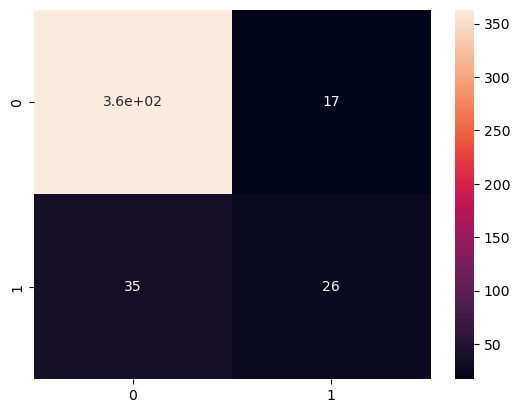

In [182]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [183]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       380
           1       0.60      0.43      0.50        61

    accuracy                           0.88       441
   macro avg       0.76      0.69      0.72       441
weighted avg       0.87      0.88      0.87       441



# Saving the model

In [184]:
import joblib
joblib.dump(lg.fit,'HR.joblib')

['HR.joblib']